In [3]:
import array
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy as cp

In [ ]:
##dataset to work with

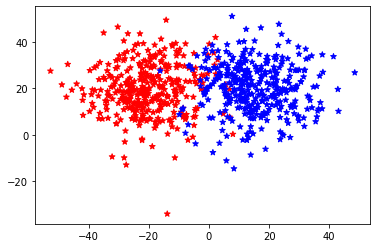

In [4]:
file=pd.read_csv("log.csv")
b=np.array(file['x'])
c=np.array(file['y'])
d=np.array(file['yclass'])
color=list([])
for i in d:
    if (i==0):
        color.append('r')
    else:
        color.append('b')
plt.scatter(b, c, marker='*', c=color)

In [5]:
def sigmoid(n):
    return (1/(1+np.exp(-n)))
def softmax(n):
    n=n-max(n)
    n=np.exp(n)
    return n/np.sum(n)

In [6]:
class hidden_layer():
    def __init__(self,x,N):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        temp=np.append(temp,x,axis=0)
        self.x=temp
        self.N=N
        self.w=np.random.rand(self.x.shape[0],self.N)
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
    def out(self):
        return self.a
    def back(self,delta):
        self.delta=delta*self.a*(1-self.a)
        self.dw=np.dot(self.x,np.transpose(self.delta))
        self.w=self.w-0.001*(self.dw)
        self.deltaw=np.dot(self.w[1:self.x.shape[0],:],self.delta)
        return self.deltaw
    def forward(self):
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
    def forward_(self,x):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        x=np.append(temp,x,axis=0)
        self.x=x
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
        return self.a

In [7]:
class final_layer():
    def __init__(self,x,N):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        temp=np.append(temp,x,axis=0)
        self.x=temp
        self.N=N
        self.w=np.random.rand(self.x.shape[0],self.N)
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=cp.deepcopy(self.z)
        self.a=sigmoid(self.z)
    def back(self,y):
        print("cost = ",end='')
        print(np.sum(np.square(self.a-y)))
        self.delta=(self.a-y)*self.a*(1-self.a)
        self.deltaw=np.dot(self.w[1:self.x.shape[0],:],self.delta)
        self.dw=np.dot(self.delta,np.transpose(self.x))
        self.w=self.w-0.001*np.transpose(self.dw)
        return self.deltaw
    def forward_(self,x):
        temp=np.ones([x.shape[1]])
        temp.resize(1,x.shape[1])
        temp=np.append(temp,x,axis=0)
        self.x=temp
        self.z=np.dot(np.transpose(self.w),self.x)
        self.a=sigmoid(self.z)
    def out(self):
        return self.a

In [8]:
class neural_network():
    def __init__(self,x,y):
        self.num_hid_layer=int(input("Enter Number of hidden Layers"))
        self.neurons_per_layer=list();
        for i in range (self.num_hid_layer):
            print("Enter number of neurons in layer ",+i+1)
            self.neurons_per_layer.append(int(input()))
        self.layer_list=[]
        self.x=x
        self.y=y
        self.l_rate=float(input("Enter learning rate"))
        self.epoch=int(input("Enter number of epochs"))
        temp=x
        for i in range (len(self.neurons_per_layer)):
            self.layer_list.append(hidden_layer(temp,self.neurons_per_layer[i]))
            temp=self.layer_list[i].out()
        self.layer_list.append(final_layer(temp,y.shape[0]))
    def train(self):
        for i in range (self.epoch):
            print("at epoch : ",end='')
            print(i,end=' ')
            for j in reversed(range (len(self.layer_list))):
                if (j==len(self.layer_list)-1):
                    temp=self.layer_list[j].back(self.y)
                else:
                    temp=self.layer_list[j].back(temp)
            for k in range (len(self.layer_list)):
                if (k==0):
                    self.layer_list[k].forward()
                    temp=self.layer_list[k].out()
                else:
                    self.layer_list[k].forward_(temp)
                    temp=self.layer_list[k].out()
        return temp.round()
    def test(self,x):
        temp=x
        for k in range (len(self.layer_list)):
            if (k==0):
                self.layer_list[k].forward_(temp)
                temp=self.layer_list[k].out()
            else:
                self.layer_list[k].forward_(temp)
                temp=self.layer_list[k].out()
        return temp

In [17]:
file=pd.read_csv("log.csv")
x=np.array(file['x'])
x.resize(1,len(x))
x=np.append(x,np.array([file['y']]),axis=0)
yt=np.array(file['yclass'])
x=np.transpose(x)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test, y_train, y_test = train_test_split(x,yt,test_size=0.33, random_state=101)

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
en=OneHotEncoder()
en2=OneHotEncoder()
en.fit(y_train.reshape(-1,1))
yy=en.transform(y_train.reshape(-1,1)).toarray()
en2.fit(y_test.reshape(-1,1))
yt=en.transform(y_test.reshape(-1,1)).toarray()

In [33]:
x_train=np.transpose(x_train)

In [36]:
#x and y is the training data
NN= neural_network(x_train,np.transpose(yy))

Enter Number of hidden Layers3
Enter number of neurons in layer  1
16
Enter number of neurons in layer  2
8
Enter number of neurons in layer  3
4
Enter learning rate1
Enter number of epochs10000


In [37]:
res=NN.train()

at epoch : 0 cost = 364.7858357473009
at epoch : 1 cost = 356.173268561284
at epoch : 2 cost = 347.0123853920825
at epoch : 3 cost = 337.39201103875973
at epoch : 4 cost = 327.4442742606964
at epoch : 5 cost = 317.3436901910222
at epoch : 6 cost = 307.30003579165293
at epoch : 7 cost = 297.54473008486735
at epoch : 8 cost = 288.3115814335371
at epoch : 9 cost = 279.8138250427728
at epoch : 10 cost = 272.22066018302985
at epoch : 11 cost = 265.6380543356625
at epoch : 12 cost = 260.09918298926135
at epoch : 13 cost = 255.56781440429762
at epoch : 14 cost = 251.95344049422116
at epoch : 15 cost = 249.13275186362108
at epoch : 16 cost = 246.97086243274677
at epoch : 17 cost = 245.33762684176224
at epoch : 18 cost = 244.11748600488633
at epoch : 19 cost = 243.21362944401315
at epoch : 20 cost = 242.54825395762654
at epoch : 21 cost = 242.06067087322964
at epoch : 22 cost = 241.704545657177
at epoch : 23 cost = 241.44504207517824
at epoch : 24 cost = 241.256254267307
at epoch : 25 cost = 24

at epoch : 215 cost = 240.75268862932438
at epoch : 216 cost = 240.75266823672524
at epoch : 217 cost = 240.75264783385632
at epoch : 218 cost = 240.7526274207071
at epoch : 219 cost = 240.7526069972672
at epoch : 220 cost = 240.7525865635262
at epoch : 221 cost = 240.75256611947356
at epoch : 222 cost = 240.75254566509886
at epoch : 223 cost = 240.75252520039157
at epoch : 224 cost = 240.7525047253412
at epoch : 225 cost = 240.75248423993725
at epoch : 226 cost = 240.75246374416918
at epoch : 227 cost = 240.7524432380264
at epoch : 228 cost = 240.7524227214984
at epoch : 229 cost = 240.7524021945746
at epoch : 230 cost = 240.75238165724437
at epoch : 231 cost = 240.75236110949714
at epoch : 232 cost = 240.75234055132233
at epoch : 233 cost = 240.75231998270922
at epoch : 234 cost = 240.75229940364727
at epoch : 235 cost = 240.7522788141258
at epoch : 236 cost = 240.75225821413406
at epoch : 237 cost = 240.75223760366143
at epoch : 238 cost = 240.7522169826972
at epoch : 239 cost = 240

at epoch : 421 cost = 240.7482548915171
at epoch : 422 cost = 240.74823214225032
at epoch : 423 cost = 240.74820938024965
at epoch : 424 cost = 240.74818660550133
at epoch : 425 cost = 240.74816381799172
at epoch : 426 cost = 240.74814101770707
at epoch : 427 cost = 240.74811820463364
at epoch : 428 cost = 240.74809537875774
at epoch : 429 cost = 240.74807254006555
at epoch : 430 cost = 240.74804968854323
at epoch : 431 cost = 240.7480268241771
at epoch : 432 cost = 240.74800394695325
at epoch : 433 cost = 240.74798105685784
at epoch : 434 cost = 240.747958153877
at epoch : 435 cost = 240.7479352379969
at epoch : 436 cost = 240.74791230920357
at epoch : 437 cost = 240.74788936748314
at epoch : 438 cost = 240.74786641282168
at epoch : 439 cost = 240.7478434452052
at epoch : 440 cost = 240.74782046461974
at epoch : 441 cost = 240.74779747105129
at epoch : 442 cost = 240.74777446448587
at epoch : 443 cost = 240.74775144490945
at epoch : 444 cost = 240.74772841230796
at epoch : 445 cost = 

at epoch : 644 cost = 240.74283970901865
at epoch : 645 cost = 240.7428137454832
at epoch : 646 cost = 240.74278776566192
at epoch : 647 cost = 240.74276176953643
at epoch : 648 cost = 240.7427357570882
at epoch : 649 cost = 240.74270972829885
at epoch : 650 cost = 240.74268368314978
at epoch : 651 cost = 240.74265762162256
at epoch : 652 cost = 240.74263154369856
at epoch : 653 cost = 240.74260544935925
at epoch : 654 cost = 240.74257933858598
at epoch : 655 cost = 240.74255321136013
at epoch : 656 cost = 240.74252706766316
at epoch : 657 cost = 240.74250090747626
at epoch : 658 cost = 240.74247473078077
at epoch : 659 cost = 240.74244853755795
at epoch : 660 cost = 240.74242232778917
at epoch : 661 cost = 240.74239610145545
at epoch : 662 cost = 240.74236985853818
at epoch : 663 cost = 240.74234359901845
at epoch : 664 cost = 240.7423173228774
at epoch : 665 cost = 240.74229103009617
at epoch : 666 cost = 240.7422647206559
at epoch : 667 cost = 240.7422383945376
at epoch : 668 cost =

at epoch : 863 cost = 240.73673071121883
at epoch : 864 cost = 240.73670069606348
at epoch : 865 cost = 240.7366706599491
at epoch : 866 cost = 240.73664060285122
at epoch : 867 cost = 240.73661052474523
at epoch : 868 cost = 240.73658042560652
at epoch : 869 cost = 240.73655030541045
at epoch : 870 cost = 240.73652016413246
at epoch : 871 cost = 240.73649000174777
at epoch : 872 cost = 240.73645981823168
at epoch : 873 cost = 240.7364296135595
at epoch : 874 cost = 240.7363993877064
at epoch : 875 cost = 240.73636914064753
at epoch : 876 cost = 240.73633887235812
at epoch : 877 cost = 240.73630858281325
at epoch : 878 cost = 240.73627827198803
at epoch : 879 cost = 240.7362479398575
at epoch : 880 cost = 240.73621758639672
at epoch : 881 cost = 240.73618721158064
at epoch : 882 cost = 240.73615681538422
at epoch : 883 cost = 240.7361263977825
at epoch : 884 cost = 240.73609595875024
at epoch : 885 cost = 240.73606549826238
at epoch : 886 cost = 240.73603501629376
at epoch : 887 cost =

at epoch : 1064 cost = 240.73024151608908
at epoch : 1065 cost = 240.73020675082518
at epoch : 1066 cost = 240.73017195899072
at epoch : 1067 cost = 240.730137140554
at epoch : 1068 cost = 240.73010229548353
at epoch : 1069 cost = 240.73006742374744
at epoch : 1070 cost = 240.73003252531407
at epoch : 1071 cost = 240.72999760015165
at epoch : 1072 cost = 240.72996264822837
at epoch : 1073 cost = 240.72992766951234
at epoch : 1074 cost = 240.7298926639717
at epoch : 1075 cost = 240.7298576315745
at epoch : 1076 cost = 240.72982257228875
at epoch : 1077 cost = 240.72978748608247
at epoch : 1078 cost = 240.72975237292357
at epoch : 1079 cost = 240.72971723278
at epoch : 1080 cost = 240.7296820656196
at epoch : 1081 cost = 240.72964687141018
at epoch : 1082 cost = 240.72961165011952
at epoch : 1083 cost = 240.72957640171543
at epoch : 1084 cost = 240.72954112616554
at epoch : 1085 cost = 240.72950582343753
at epoch : 1086 cost = 240.72947049349906
at epoch : 1087 cost = 240.72943513631765


at epoch : 1278 cost = 240.72214169739928
at epoch : 1279 cost = 240.7221004568927
at epoch : 1280 cost = 240.72205918205367
at epoch : 1281 cost = 240.7220178728407
at epoch : 1282 cost = 240.72197652921227
at epoch : 1283 cost = 240.72193515112676
at epoch : 1284 cost = 240.72189373854252
at epoch : 1285 cost = 240.72185229141792
at epoch : 1286 cost = 240.72181080971114
at epoch : 1287 cost = 240.7217692933804
at epoch : 1288 cost = 240.72172774238382
at epoch : 1289 cost = 240.7216861566795
at epoch : 1290 cost = 240.7216445362255
at epoch : 1291 cost = 240.72160288097973
at epoch : 1292 cost = 240.72156119090016
at epoch : 1293 cost = 240.72151946594465
at epoch : 1294 cost = 240.72147770607097
at epoch : 1295 cost = 240.72143591123694
at epoch : 1296 cost = 240.7213940814002
at epoch : 1297 cost = 240.72135221651843
at epoch : 1298 cost = 240.72131031654916
at epoch : 1299 cost = 240.72126838145
at epoch : 1300 cost = 240.72122641117835
at epoch : 1301 cost = 240.7211844056917
at

at epoch : 1512 cost = 240.7114608602177
at epoch : 1513 cost = 240.71141032789052
at epoch : 1514 cost = 240.71135974980996
at epoch : 1515 cost = 240.71130912591852
at epoch : 1516 cost = 240.71125845615853
at epoch : 1517 cost = 240.71120774047236
at epoch : 1518 cost = 240.71115697880225
at epoch : 1519 cost = 240.7111061710903
at epoch : 1520 cost = 240.7110553172786
at epoch : 1521 cost = 240.71100441730908
at epoch : 1522 cost = 240.71095347112362
at epoch : 1523 cost = 240.71090247866402
at epoch : 1524 cost = 240.7108514398719
at epoch : 1525 cost = 240.71080035468896
at epoch : 1526 cost = 240.71074922305667
at epoch : 1527 cost = 240.7106980449164
at epoch : 1528 cost = 240.71064682020952
at epoch : 1529 cost = 240.71059554887734
at epoch : 1530 cost = 240.71054423086088
at epoch : 1531 cost = 240.71049286610128
at epoch : 1532 cost = 240.71044145453948
at epoch : 1533 cost = 240.7103899961163
at epoch : 1534 cost = 240.71033849077259
at epoch : 1535 cost = 240.7102869384490

at epoch : 1714 cost = 240.700240059385
at epoch : 1715 cost = 240.70017898093838
at epoch : 1716 cost = 240.7001178429762
at epoch : 1717 cost = 240.7000566454176
at epoch : 1718 cost = 240.69999538818146
at epoch : 1719 cost = 240.69993407118665
at epoch : 1720 cost = 240.69987269435174
at epoch : 1721 cost = 240.69981125759523
at epoch : 1722 cost = 240.69974976083552
at epoch : 1723 cost = 240.69968820399072
at epoch : 1724 cost = 240.69962658697898
at epoch : 1725 cost = 240.6995649097181
at epoch : 1726 cost = 240.69950317212584
at epoch : 1727 cost = 240.69944137411983
at epoch : 1728 cost = 240.69937951561747
at epoch : 1729 cost = 240.69931759653605
at epoch : 1730 cost = 240.69925561679273
at epoch : 1731 cost = 240.69919357630448
at epoch : 1732 cost = 240.69913147498806
at epoch : 1733 cost = 240.6990693127603
at epoch : 1734 cost = 240.69900708953753
at epoch : 1735 cost = 240.69894480523627
at epoch : 1736 cost = 240.69888245977268
at epoch : 1737 cost = 240.6988200530627

at epoch : 1929 cost = 240.68559285600898
at epoch : 1930 cost = 240.6855168505398
at epoch : 1931 cost = 240.6854407642441
at epoch : 1932 cost = 240.68536459700238
at epoch : 1933 cost = 240.68528834869505
at epoch : 1934 cost = 240.6852120192022
at epoch : 1935 cost = 240.68513560840378
at epoch : 1936 cost = 240.6850591161796
at epoch : 1937 cost = 240.68498254240913
at epoch : 1938 cost = 240.68490588697176
at epoch : 1939 cost = 240.68482914974663
at epoch : 1940 cost = 240.68475233061264
at epoch : 1941 cost = 240.6846754294486
at epoch : 1942 cost = 240.68459844613295
at epoch : 1943 cost = 240.68452138054408
at epoch : 1944 cost = 240.6844442325601
at epoch : 1945 cost = 240.68436700205896
at epoch : 1946 cost = 240.6842896889183
at epoch : 1947 cost = 240.68421229301572
at epoch : 1948 cost = 240.6841348142285
at epoch : 1949 cost = 240.68405725243372
at epoch : 1950 cost = 240.68397960750826
at epoch : 1951 cost = 240.68390187932891
at epoch : 1952 cost = 240.68382406777212


at epoch : 2140 cost = 240.6675636574426
at epoch : 2141 cost = 240.66746761772322
at epoch : 2142 cost = 240.66737146696306
at epoch : 2143 cost = 240.66727520498895
at epoch : 2144 cost = 240.66717883162713
at epoch : 2145 cost = 240.66708234670352
at epoch : 2146 cost = 240.66698575004372
at epoch : 2147 cost = 240.66688904147276
at epoch : 2148 cost = 240.6667922208154
at epoch : 2149 cost = 240.6666952878959
at epoch : 2150 cost = 240.66659824253816
at epoch : 2151 cost = 240.66650108456565
at epoch : 2152 cost = 240.6664038138014
at epoch : 2153 cost = 240.66630643006803
at epoch : 2154 cost = 240.6662089331878
at epoch : 2155 cost = 240.66611132298235
at epoch : 2156 cost = 240.66601359927313
at epoch : 2157 cost = 240.66591576188097
at epoch : 2158 cost = 240.66581781062644
at epoch : 2159 cost = 240.6657197453294
at epoch : 2160 cost = 240.6656215658096
at epoch : 2161 cost = 240.6655232718861
at epoch : 2162 cost = 240.66542486337755
at epoch : 2163 cost = 240.66532634010224


at epoch : 2340 cost = 240.64588376731828
at epoch : 2341 cost = 240.64576131077843
at epoch : 2342 cost = 240.64563869549372
at epoch : 2343 cost = 240.64551592112662
at epoch : 2344 cost = 240.6453929873383
at epoch : 2345 cost = 240.64526989378842
at epoch : 2346 cost = 240.64514664013535
at epoch : 2347 cost = 240.64502322603607
at epoch : 2348 cost = 240.6448996511461
at epoch : 2349 cost = 240.64477591511968
at epoch : 2350 cost = 240.64465201760953
at epoch : 2351 cost = 240.64452795826705
at epoch : 2352 cost = 240.64440373674216
at epoch : 2353 cost = 240.64427935268344
at epoch : 2354 cost = 240.6441548057379
at epoch : 2355 cost = 240.6440300955513
at epoch : 2356 cost = 240.64390522176782
at epoch : 2357 cost = 240.6437801840303
at epoch : 2358 cost = 240.64365498198003
at epoch : 2359 cost = 240.64352961525694
at epoch : 2360 cost = 240.64340408349943
at epoch : 2361 cost = 240.64327838634443
at epoch : 2362 cost = 240.64315252342746
at epoch : 2363 cost = 240.643026494382

at epoch : 2604 cost = 240.60669487370114
at epoch : 2605 cost = 240.60651362548975
at epoch : 2606 cost = 240.60633206769486
at epoch : 2607 cost = 240.60615019948764
at epoch : 2608 cost = 240.60596802003766
at epoch : 2609 cost = 240.60578552851274
at epoch : 2610 cost = 240.60560272407895
at epoch : 2611 cost = 240.60541960590086
at epoch : 2612 cost = 240.60523617314115
at epoch : 2613 cost = 240.60505242496095
at epoch : 2614 cost = 240.60486836051965
at epoch : 2615 cost = 240.60468397897512
at epoch : 2616 cost = 240.60449927948343
at epoch : 2617 cost = 240.60431426119914
at epoch : 2618 cost = 240.60412892327506
at epoch : 2619 cost = 240.60394326486244
at epoch : 2620 cost = 240.6037572851109
at epoch : 2621 cost = 240.60357098316854
at epoch : 2622 cost = 240.60338435818164
at epoch : 2623 cost = 240.60319740929515
at epoch : 2624 cost = 240.6030101356523
at epoch : 2625 cost = 240.60282253639474
at epoch : 2626 cost = 240.60263461066256
at epoch : 2627 cost = 240.602446357

at epoch : 2807 cost = 240.56231420497983
at epoch : 2808 cost = 240.56205110742815
at epoch : 2809 cost = 240.56178750155402
at epoch : 2810 cost = 240.56152338619205
at epoch : 2811 cost = 240.56125876017438
at epoch : 2812 cost = 240.56099362233027
at epoch : 2813 cost = 240.5607279714865
at epoch : 2814 cost = 240.56046180646698
at epoch : 2815 cost = 240.56019512609308
at epoch : 2816 cost = 240.55992792918335
at epoch : 2817 cost = 240.55966021455376
at epoch : 2818 cost = 240.55939198101737
at epoch : 2819 cost = 240.55912322738465
at epoch : 2820 cost = 240.55885395246324
at epoch : 2821 cost = 240.55858415505804
at epoch : 2822 cost = 240.55831383397123
at epoch : 2823 cost = 240.55804298800217
at epoch : 2824 cost = 240.5577716159474
at epoch : 2825 cost = 240.55749971660072
at epoch : 2826 cost = 240.55722728875307
at epoch : 2827 cost = 240.55695433119263
at epoch : 2828 cost = 240.55668084270474
at epoch : 2829 cost = 240.5564068220719
at epoch : 2830 cost = 240.5561322680

at epoch : 3037 cost = 240.48573496332025
at epoch : 3038 cost = 240.48531777232006
at epoch : 3039 cost = 240.4848997082156
at epoch : 3040 cost = 240.48448076869133
at epoch : 3041 cost = 240.48406095142025
at epoch : 3042 cost = 240.4836402540637
at epoch : 3043 cost = 240.48321867427126
at epoch : 3044 cost = 240.48279620968083
at epoch : 3045 cost = 240.48237285791842
at epoch : 3046 cost = 240.48194861659795
at epoch : 3047 cost = 240.48152348332138
at epoch : 3048 cost = 240.4810974556784
at epoch : 3049 cost = 240.48067053124652
at epoch : 3050 cost = 240.48024270759083
at epoch : 3051 cost = 240.47981398226406
at epoch : 3052 cost = 240.47938435280628
at epoch : 3053 cost = 240.47895381674496
at epoch : 3054 cost = 240.4785223715949
at epoch : 3055 cost = 240.4780900148579
at epoch : 3056 cost = 240.47765674402314
at epoch : 3057 cost = 240.47722255656646
at epoch : 3058 cost = 240.47678744995076
at epoch : 3059 cost = 240.47635142162574
at epoch : 3060 cost = 240.475914469027

at epoch : 3274 cost = 240.35539650516841
at epoch : 3275 cost = 240.35467223542187
at epoch : 3276 cost = 240.35394606244878
at epoch : 3277 cost = 240.35321797947606
at epoch : 3278 cost = 240.3524879797079
at epoch : 3279 cost = 240.35175605632594
at epoch : 3280 cost = 240.35102220248893
at epoch : 3281 cost = 240.3502864113329
at epoch : 3282 cost = 240.3495486759706
at epoch : 3283 cost = 240.34880898949206
at epoch : 3284 cost = 240.3480673449638
at epoch : 3285 cost = 240.3473237354291
at epoch : 3286 cost = 240.34657815390784
at epoch : 3287 cost = 240.34583059339624
at epoch : 3288 cost = 240.34508104686688
at epoch : 3289 cost = 240.34432950726847
at epoch : 3290 cost = 240.3435759675257
at epoch : 3291 cost = 240.34282042053917
at epoch : 3292 cost = 240.34206285918515
at epoch : 3293 cost = 240.34130327631556
at epoch : 3294 cost = 240.3405416647576
at epoch : 3295 cost = 240.33977801731385
at epoch : 3296 cost = 240.3390123267618
at epoch : 3297 cost = 240.338244585854
at

at epoch : 3499 cost = 240.12816104479728
at epoch : 3500 cost = 240.12676291880882
at epoch : 3501 cost = 240.12536011401073
at epoch : 3502 cost = 240.12395260742323
at epoch : 3503 cost = 240.12254037591345
at epoch : 3504 cost = 240.12112339619443
at epoch : 3505 cost = 240.11970164482432
at epoch : 3506 cost = 240.1182750982053
at epoch : 3507 cost = 240.11684373258282
at epoch : 3508 cost = 240.11540752404466
at epoch : 3509 cost = 240.1139664485198
at epoch : 3510 cost = 240.11252048177786
at epoch : 3511 cost = 240.11106959942788
at epoch : 3512 cost = 240.10961377691748
at epoch : 3513 cost = 240.10815298953207
at epoch : 3514 cost = 240.10668721239378
at epoch : 3515 cost = 240.10521642046052
at epoch : 3516 cost = 240.10374058852526
at epoch : 3517 cost = 240.10225969121495
at epoch : 3518 cost = 240.10077370298958
at epoch : 3519 cost = 240.09928259814149
at epoch : 3520 cost = 240.09778635079414
at epoch : 3521 cost = 240.09628493490146
at epoch : 3522 cost = 240.094778324

at epoch : 3732 cost = 239.60473818688814
at epoch : 3733 cost = 239.60119603427557
at epoch : 3734 cost = 239.59763750062427
at epoch : 3735 cost = 239.5940624882624
at epoch : 3736 cost = 239.59047089870825
at epoch : 3737 cost = 239.58686263266333
at epoch : 3738 cost = 239.58323759000615
at epoch : 3739 cost = 239.57959566978548
at epoch : 3740 cost = 239.5759367702142
at epoch : 3741 cost = 239.57226078866327
at epoch : 3742 cost = 239.56856762165535
at epoch : 3743 cost = 239.564857164859
at epoch : 3744 cost = 239.56112931308274
at epoch : 3745 cost = 239.55738396026908
at epoch : 3746 cost = 239.553620999489
at epoch : 3747 cost = 239.54984032293603
at epoch : 3748 cost = 239.5460418219206
at epoch : 3749 cost = 239.54222538686446
at epoch : 3750 cost = 239.53839090729514
at epoch : 3751 cost = 239.53453827184006
at epoch : 3752 cost = 239.53066736822126
at epoch : 3753 cost = 239.5267780832495
at epoch : 3754 cost = 239.52287030281866
at epoch : 3755 cost = 239.5189439119
at e

at epoch : 3932 cost = 238.36746644689282
at epoch : 3933 cost = 238.35711515194936
at epoch : 3934 cost = 238.34670364642304
at epoch : 3935 cost = 238.3362316068926
at epoch : 3936 cost = 238.32569870727167
at epoch : 3937 cost = 238.31510461870107
at epoch : 3938 cost = 238.30444900944383
at epoch : 3939 cost = 238.29373154478446
at epoch : 3940 cost = 238.28295188693124
at epoch : 3941 cost = 238.27210969492353
at epoch : 3942 cost = 238.26120462454298
at epoch : 3943 cost = 238.25023632822973
at epoch : 3944 cost = 238.23920445500355
at epoch : 3945 cost = 238.22810865039017
at epoch : 3946 cost = 238.21694855635286
at epoch : 3947 cost = 238.20572381122972
at epoch : 3948 cost = 238.19443404967643
at epoch : 3949 cost = 238.18307890261508
at epoch : 3950 cost = 238.17165799718828
at epoch : 3951 cost = 238.1601709567199
at epoch : 3952 cost = 238.1486174006809
at epoch : 3953 cost = 238.1369969446617
at epoch : 3954 cost = 238.1253092003498
at epoch : 3955 cost = 238.113553775513

at epoch : 4163 cost = 232.82285378674476
at epoch : 4164 cost = 232.76772756746269
at epoch : 4165 cost = 232.7119858362109
at epoch : 4166 cost = 232.6556196905978
at epoch : 4167 cost = 232.59862013662962
at epoch : 4168 cost = 232.54097808950416
at epoch : 4169 cost = 232.48268437423036
at epoch : 4170 cost = 232.42372972603312
at epoch : 4171 cost = 232.36410479050164
at epoch : 4172 cost = 232.30380012344017
at epoch : 4173 cost = 232.24280619038004
at epoch : 4174 cost = 232.18111336571476
at epoch : 4175 cost = 232.11871193142315
at epoch : 4176 cost = 232.05559207534924
at epoch : 4177 cost = 231.9917438890152
at epoch : 4178 cost = 231.9271573649488
at epoch : 4179 cost = 231.86182239351626
at epoch : 4180 cost = 231.7957287592611
at epoch : 4181 cost = 231.72886613675777
at epoch : 4182 cost = 231.66122408600236
at epoch : 4183 cost = 231.59279204737078
at epoch : 4184 cost = 231.523559336189
at epoch : 4185 cost = 231.4535151369677
at epoch : 4186 cost = 231.38264849736697


at epoch : 4388 cost = 165.53528211697756
at epoch : 4389 cost = 164.76410370838062
at epoch : 4390 cost = 163.98760660128508
at epoch : 4391 cost = 163.2057032443173
at epoch : 4392 cost = 162.41838541153396
at epoch : 4393 cost = 161.6257388874481
at epoch : 4394 cost = 160.82794852130215
at epoch : 4395 cost = 160.02529104390266
at epoch : 4396 cost = 159.21811628057705
at epoch : 4397 cost = 158.40682104671976
at epoch : 4398 cost = 157.59182234430023
at epoch : 4399 cost = 156.77353625862884
at epoch : 4400 cost = 155.9523663034825
at epoch : 4401 cost = 155.1287012303734
at epoch : 4402 cost = 154.302919181798
at epoch : 4403 cost = 153.47539364438512
at epoch : 4404 cost = 152.64649716657678
at epoch : 4405 cost = 151.81660072005198
at epoch : 4406 cost = 150.98606896360593
at epoch : 4407 cost = 150.1552535318752
at epoch : 4408 cost = 149.32448716724022
at epoch : 4409 cost = 148.49408095751664
at epoch : 4410 cost = 147.66432558146437
at epoch : 4411 cost = 146.83549598118853

at epoch : 4631 cost = 62.63999572573888
at epoch : 4632 cost = 62.517609683889745
at epoch : 4633 cost = 62.39587114465726
at epoch : 4634 cost = 62.27475795037964
at epoch : 4635 cost = 62.15424796352781
at epoch : 4636 cost = 62.03431918174584
at epoch : 4637 cost = 61.91494987675739
at epoch : 4638 cost = 61.796118759074886
at epoch : 4639 cost = 61.67780516995228
at epoch : 4640 cost = 61.55998930128291
at epoch : 4641 cost = 61.442652443131465
at epoch : 4642 cost = 61.325777257281544
at epoch : 4643 cost = 61.20934807358172
at epoch : 4644 cost = 61.09335120401268
at epoch : 4645 cost = 60.97777526734295
at epoch : 4646 cost = 60.86261151509876
at epoch : 4647 cost = 60.74785414749505
at epoch : 4648 cost = 60.633500606146214
at epoch : 4649 cost = 60.519551829009835
at epoch : 4650 cost = 60.40601245233185
at epoch : 4651 cost = 60.29289094455577
at epoch : 4652 cost = 60.18019965838204
at epoch : 4653 cost = 60.06795478948652
at epoch : 4654 cost = 59.9561762338064
at epoch : 

at epoch : 4871 cost = 46.998239195608356
at epoch : 4872 cost = 46.96728784370877
at epoch : 4873 cost = 46.93652951539025
at epoch : 4874 cost = 46.90596070472121
at epoch : 4875 cost = 46.87557803766377
at epoch : 4876 cost = 46.84537826443552
at epoch : 4877 cost = 46.815358252295376
at epoch : 4878 cost = 46.7855149787401
at epoch : 4879 cost = 46.75584552509588
at epoch : 4880 cost = 46.72634707048779
at epoch : 4881 cost = 46.69701688616942
at epoch : 4882 cost = 46.66785233019407
at epoch : 4883 cost = 46.63885084240937
at epoch : 4884 cost = 46.61000993975733
at epoch : 4885 cost = 46.58132721186226
at epoch : 4886 cost = 46.552800316889645
at epoch : 4887 cost = 46.52442697766
at epoch : 4888 cost = 46.49620497800224
at epoch : 4889 cost = 46.46813215933233
at epoch : 4890 cost = 46.44020641744362
at epoch : 4891 cost = 46.4124256994962
at epoch : 4892 cost = 46.384788001193606
at epoch : 4893 cost = 46.3572913641361
at epoch : 4894 cost = 46.32993387334041
at epoch : 4895 co

at epoch : 5141 cost = 41.99557149224512
at epoch : 5142 cost = 41.98429196904651
at epoch : 5143 cost = 41.973061668354006
at epoch : 5144 cost = 41.96188038372958
at epoch : 5145 cost = 41.95074788281565
at epoch : 5146 cost = 41.93966390948795
at epoch : 5147 cost = 41.92862818595236
at epoch : 5148 cost = 41.9176404147748
at epoch : 5149 cost = 41.90670028083521
at epoch : 5150 cost = 41.89580745319857
at epoch : 5151 cost = 41.88496158689788
at epoch : 5152 cost = 41.87416232462546
at epoch : 5153 cost = 41.863409298330524
at epoch : 5154 cost = 41.85270213072206
at epoch : 5155 cost = 41.84204043667725
at epoch : 5156 cost = 41.8314238245564
at epoch : 5157 cost = 41.82085189742635
at epoch : 5158 cost = 41.81032425419468
at epoch : 5159 cost = 41.79984049065773
at epoch : 5160 cost = 41.78940020046566
at epoch : 5161 cost = 41.77900297600813
at epoch : 5162 cost = 41.76864840922454
at epoch : 5163 cost = 41.75833609234246
at epoch : 5164 cost = 41.748065618548395
at epoch : 5165

at epoch : 5351 cost = 40.30346224871911
at epoch : 5352 cost = 40.29752361506053
at epoch : 5353 cost = 40.29159909405143
at epoch : 5354 cost = 40.28568863158688
at epoch : 5355 cost = 40.2797921738334
at epoch : 5356 cost = 40.273909667226526
at epoch : 5357 cost = 40.26804105846861
at epoch : 5358 cost = 40.26218629452655
at epoch : 5359 cost = 40.25634532262963
at epoch : 5360 cost = 40.2505180902673
at epoch : 5361 cost = 40.24470454518709
at epoch : 5362 cost = 40.23890463539247
at epoch : 5363 cost = 40.23311830914082
at epoch : 5364 cost = 40.22734551494135
at epoch : 5365 cost = 40.221586201553094
at epoch : 5366 cost = 40.21584031798298
at epoch : 5367 cost = 40.2101078134838
at epoch : 5368 cost = 40.204388637552356
at epoch : 5369 cost = 40.19868273992752
at epoch : 5370 cost = 40.19299007058835
at epoch : 5371 cost = 40.18731057975232
at epoch : 5372 cost = 40.18164421787342
at epoch : 5373 cost = 40.175990935640385
at epoch : 5374 cost = 40.170350683974945
at epoch : 537

at epoch : 5556 cost = 39.319428146865036
at epoch : 5557 cost = 39.31552869191638
at epoch : 5558 cost = 39.31163599340633
at epoch : 5559 cost = 39.30775002774433
at epoch : 5560 cost = 39.30387077141939
at epoch : 5561 cost = 39.299998200999596
at epoch : 5562 cost = 39.29613229313182
at epoch : 5563 cost = 39.29227302454126
at epoch : 5564 cost = 39.28842037203111
at epoch : 5565 cost = 39.284574312482114
at epoch : 5566 cost = 39.28073482285224
at epoch : 5567 cost = 39.276901880176254
at epoch : 5568 cost = 39.2730754615654
at epoch : 5569 cost = 39.269255544206956
at epoch : 5570 cost = 39.2654421053639
at epoch : 5571 cost = 39.261635122374585
at epoch : 5572 cost = 39.25783457265225
at epoch : 5573 cost = 39.254040433684764
at epoch : 5574 cost = 39.25025268303423
at epoch : 5575 cost = 39.246471298336616
at epoch : 5576 cost = 39.242696257301375
at epoch : 5577 cost = 39.23892753771113
at epoch : 5578 cost = 39.2351651174213
at epoch : 5579 cost = 39.23140897435976
at epoch :

at epoch : 5797 cost = 38.529562531836696
at epoch : 5798 cost = 38.526751155557385
at epoch : 5799 cost = 38.52394250362998
at epoch : 5800 cost = 38.521136564425994
at epoch : 5801 cost = 38.518333326350756
at epoch : 5802 cost = 38.51553277784343
at epoch : 5803 cost = 38.512734907377016
at epoch : 5804 cost = 38.50993970345827
at epoch : 5805 cost = 38.507147154627745
at epoch : 5806 cost = 38.50435724945976
at epoch : 5807 cost = 38.50156997656237
at epoch : 5808 cost = 38.498785324577376
at epoch : 5809 cost = 38.49600328218031
at epoch : 5810 cost = 38.49322383808042
at epoch : 5811 cost = 38.49044698102068
at epoch : 5812 cost = 38.487672699777775
at epoch : 5813 cost = 38.48490098316209
at epoch : 5814 cost = 38.482131820017685
at epoch : 5815 cost = 38.47936519922239
at epoch : 5816 cost = 38.47660110968769
at epoch : 5817 cost = 38.473839540358796
at epoch : 5818 cost = 38.471080480214624
at epoch : 5819 cost = 38.468323918267814
at epoch : 5820 cost = 38.46556984356473
at e

at epoch : 6003 cost = 37.99380889065998
at epoch : 6004 cost = 37.99136493937793
at epoch : 6005 cost = 37.98892211622382
at epoch : 6006 cost = 37.98648041829697
at epoch : 6007 cost = 37.98403984275578
at epoch : 6008 cost = 37.98160038681774
at epoch : 6009 cost = 37.979162047759715
at epoch : 6010 cost = 37.976724822918
at epoch : 6011 cost = 37.9742887096886
at epoch : 6012 cost = 37.97185370552727
at epoch : 6013 cost = 37.96941980794973
at epoch : 6014 cost = 37.966987014531796
at epoch : 6015 cost = 37.96455532290955
at epoch : 6016 cost = 37.96212473077945
at epoch : 6017 cost = 37.95969523589853
at epoch : 6018 cost = 37.95726683608448
at epoch : 6019 cost = 37.95483952921583
at epoch : 6020 cost = 37.95241331323207
at epoch : 6021 cost = 37.94998818613379
at epoch : 6022 cost = 37.94756414598281
at epoch : 6023 cost = 37.945141190902305
at epoch : 6024 cost = 37.942719319076936
at epoch : 6025 cost = 37.940298528753
at epoch : 6026 cost = 37.93787881823848
at epoch : 6027 c

at epoch : 6202 cost = 37.52982554350842
at epoch : 6203 cost = 37.527627349549114
at epoch : 6204 cost = 37.5254308541875
at epoch : 6205 cost = 37.52323606452862
at epoch : 6206 cost = 37.521042987687956
at epoch : 6207 cost = 37.518851630790806
at epoch : 6208 cost = 37.51666200097153
at epoch : 6209 cost = 37.514474105372955
at epoch : 6210 cost = 37.51228795114568
at epoch : 6211 cost = 37.51010354544737
at epoch : 6212 cost = 37.507920895442126
at epoch : 6213 cost = 37.50574000829978
at epoch : 6214 cost = 37.503560891195235
at epoch : 6215 cost = 37.50138355130774
at epoch : 6216 cost = 37.4992079958203
at epoch : 6217 cost = 37.49703423191889
at epoch : 6218 cost = 37.494862266791856
at epoch : 6219 cost = 37.49269210762919
at epoch : 6220 cost = 37.49052376162185
at epoch : 6221 cost = 37.488357235961104
at epoch : 6222 cost = 37.48619253783781
at epoch : 6223 cost = 37.48402967444176
at epoch : 6224 cost = 37.481868652960955
at epoch : 6225 cost = 37.47970948058101
at epoch 

at epoch : 6442 cost = 37.06462651438843
at epoch : 6443 cost = 37.06298461730479
at epoch : 6444 cost = 37.06134521375507
at epoch : 6445 cost = 37.05970830098628
at epoch : 6446 cost = 37.05807387620424
at epoch : 6447 cost = 37.05644193657402
at epoch : 6448 cost = 37.05481247922025
at epoch : 6449 cost = 37.05318550122757
at epoch : 6450 cost = 37.05156099964097
at epoch : 6451 cost = 37.04993897146622
at epoch : 6452 cost = 37.048319413670214
at epoch : 6453 cost = 37.04670232318139
at epoch : 6454 cost = 37.04508769689014
at epoch : 6455 cost = 37.043475531649165
at epoch : 6456 cost = 37.04186582427387
at epoch : 6457 cost = 37.04025857154279
at epoch : 6458 cost = 37.038653770198
at epoch : 6459 cost = 37.03705141694543
at epoch : 6460 cost = 37.03545150845536
at epoch : 6461 cost = 37.033854041362744
at epoch : 6462 cost = 37.03225901226767
at epoch : 6463 cost = 37.030666417735716
at epoch : 6464 cost = 37.02907625429838
at epoch : 6465 cost = 37.027488518453445
at epoch : 64

at epoch : 6683 cost = 36.73149552565748
at epoch : 6684 cost = 36.730330024839986
at epoch : 6685 cost = 36.729165957312276
at epoch : 6686 cost = 36.72800331929602
at epoch : 6687 cost = 36.72684210702672
at epoch : 6688 cost = 36.725682316753684
at epoch : 6689 cost = 36.724523944740085
at epoch : 6690 cost = 36.723366987262885
at epoch : 6691 cost = 36.72221144061288
at epoch : 6692 cost = 36.72105730109472
at epoch : 6693 cost = 36.71990456502684
at epoch : 6694 cost = 36.71875322874149
at epoch : 6695 cost = 36.717603288584776
at epoch : 6696 cost = 36.71645474091657
at epoch : 6697 cost = 36.71530758211053
at epoch : 6698 cost = 36.714161808554145
at epoch : 6699 cost = 36.713017416648654
at epoch : 6700 cost = 36.71187440280906
at epoch : 6701 cost = 36.710732763464165
at epoch : 6702 cost = 36.70959249505647
at epoch : 6703 cost = 36.70845359404224
at epoch : 6704 cost = 36.70731605689148
at epoch : 6705 cost = 36.70617988008786
at epoch : 6706 cost = 36.70504506012877
at epoc

at epoch : 6892 cost = 36.514392637370925
at epoch : 6893 cost = 36.513463418370904
at epoch : 6894 cost = 36.51253510171868
at epoch : 6895 cost = 36.51160768582882
at epoch : 6896 cost = 36.51068116912209
at epoch : 6897 cost = 36.509755550025375
at epoch : 6898 cost = 36.50883082697172
at epoch : 6899 cost = 36.5079069984002
at epoch : 6900 cost = 36.50698406275594
at epoch : 6901 cost = 36.506062018490084
at epoch : 6902 cost = 36.50514086405973
at epoch : 6903 cost = 36.504220597927926
at epoch : 6904 cost = 36.503301218563585
at epoch : 6905 cost = 36.50238272444153
at epoch : 6906 cost = 36.501465114042375
at epoch : 6907 cost = 36.50054838585257
at epoch : 6908 cost = 36.49963253836429
at epoch : 6909 cost = 36.49871757007545
at epoch : 6910 cost = 36.49780347948966
at epoch : 6911 cost = 36.49689026511619
at epoch : 6912 cost = 36.49597792546996
at epoch : 6913 cost = 36.49506645907144
at epoch : 6914 cost = 36.4941558644467
at epoch : 6915 cost = 36.49324614012728
at epoch : 

at epoch : 7113 cost = 36.32862869995664
at epoch : 7114 cost = 36.32786850808249
at epoch : 7115 cost = 36.327108969496315
at epoch : 7116 cost = 36.326350083368666
at epoch : 7117 cost = 36.32559184887179
at epoch : 7118 cost = 36.32483426517953
at epoch : 7119 cost = 36.32407733146738
at epoch : 7120 cost = 36.32332104691242
at epoch : 7121 cost = 36.32256541069338
at epoch : 7122 cost = 36.321810421990556
at epoch : 7123 cost = 36.32105607998583
at epoch : 7124 cost = 36.32030238386271
at epoch : 7125 cost = 36.319549332806226
at epoch : 7126 cost = 36.318796926003
at epoch : 7127 cost = 36.31804516264121
at epoch : 7128 cost = 36.317294041910586
at epoch : 7129 cost = 36.31654356300238
at epoch : 7130 cost = 36.31579372510937
at epoch : 7131 cost = 36.31504452742592
at epoch : 7132 cost = 36.31429596914782
at epoch : 7133 cost = 36.31354804947244
at epoch : 7134 cost = 36.3128007675986
at epoch : 7135 cost = 36.31205412272665
at epoch : 7136 cost = 36.3113081140584
at epoch : 7137

at epoch : 7314 cost = 36.18794531691577
at epoch : 7315 cost = 36.18730150720452
at epoch : 7316 cost = 36.186658208638036
at epoch : 7317 cost = 36.18601542060343
at epoch : 7318 cost = 36.185373142488565
at epoch : 7319 cost = 36.18473137368207
at epoch : 7320 cost = 36.18409011357326
at epoch : 7321 cost = 36.183449361552235
at epoch : 7322 cost = 36.18280911700982
at epoch : 7323 cost = 36.18216937933758
at epoch : 7324 cost = 36.181530147927816
at epoch : 7325 cost = 36.18089142217359
at epoch : 7326 cost = 36.18025320146863
at epoch : 7327 cost = 36.179615485207464
at epoch : 7328 cost = 36.178978272785315
at epoch : 7329 cost = 36.178341563598146
at epoch : 7330 cost = 36.177705357042655
at epoch : 7331 cost = 36.17706965251624
at epoch : 7332 cost = 36.176434449417044
at epoch : 7333 cost = 36.17579974714394
at epoch : 7334 cost = 36.17516554509649
at epoch : 7335 cost = 36.17453184267502
at epoch : 7336 cost = 36.17389863928054
at epoch : 7337 cost = 36.173265934314784
at epo

at epoch : 7555 cost = 36.04625192660253
at epoch : 7556 cost = 36.04571514249707
at epoch : 7557 cost = 36.04517874102138
at epoch : 7558 cost = 36.044642721716194
at epoch : 7559 cost = 36.044107084122835
at epoch : 7560 cost = 36.04357182778324
at epoch : 7561 cost = 36.04303695223989
at epoch : 7562 cost = 36.04250245703582
at epoch : 7563 cost = 36.0419683417147
at epoch : 7564 cost = 36.04143460582075
at epoch : 7565 cost = 36.04090124889873
at epoch : 7566 cost = 36.040368270494014
at epoch : 7567 cost = 36.03983567015255
at epoch : 7568 cost = 36.03930344742085
at epoch : 7569 cost = 36.038771601845994
at epoch : 7570 cost = 36.03824013297564
at epoch : 7571 cost = 36.03770904035804
at epoch : 7572 cost = 36.03717832354198
at epoch : 7573 cost = 36.036647982076836
at epoch : 7574 cost = 36.036118015512585
at epoch : 7575 cost = 36.03558842339972
at epoch : 7576 cost = 36.035059205289365
at epoch : 7577 cost = 36.03453036073316
at epoch : 7578 cost = 36.03400188928335
at epoch :

at epoch : 7797 cost = 35.9265148506386
at epoch : 7798 cost = 35.92605856881072
at epoch : 7799 cost = 35.925602574474226
at epoch : 7800 cost = 35.92514686729868
at epoch : 7801 cost = 35.92469144695417
at epoch : 7802 cost = 35.924236313111244
at epoch : 7803 cost = 35.92378146544093
at epoch : 7804 cost = 35.923326903614736
at epoch : 7805 cost = 35.922872627304656
at epoch : 7806 cost = 35.92241863618313
at epoch : 7807 cost = 35.92196492992311
at epoch : 7808 cost = 35.92151150819801
at epoch : 7809 cost = 35.921058370681706
at epoch : 7810 cost = 35.920605517048585
at epoch : 7811 cost = 35.92015294697346
at epoch : 7812 cost = 35.91970066013165
at epoch : 7813 cost = 35.91924865619896
at epoch : 7814 cost = 35.91879693485161
at epoch : 7815 cost = 35.918345495766374
at epoch : 7816 cost = 35.91789433862043
at epoch : 7817 cost = 35.917443463091445
at epoch : 7818 cost = 35.91699286885758
at epoch : 7819 cost = 35.91654255559744
at epoch : 7820 cost = 35.916092522990105
at epoch

at epoch : 8033 cost = 35.82614716307686
at epoch : 8034 cost = 35.82575053757981
at epoch : 8035 cost = 35.82535413374409
at epoch : 8036 cost = 35.82495795133758
at epoch : 8037 cost = 35.824561990128494
at epoch : 8038 cost = 35.824166249885415
at epoch : 8039 cost = 35.82377073037727
at epoch : 8040 cost = 35.82337543137333
at epoch : 8041 cost = 35.822980352643214
at epoch : 8042 cost = 35.82258549395691
at epoch : 8043 cost = 35.82219085508471
at epoch : 8044 cost = 35.82179643579731
at epoch : 8045 cost = 35.82140223586572
at epoch : 8046 cost = 35.8210082550613
at epoch : 8047 cost = 35.82061449315576
at epoch : 8048 cost = 35.820220949921136
at epoch : 8049 cost = 35.81982762512986
at epoch : 8050 cost = 35.819434518554644
at epoch : 8051 cost = 35.819041629968595
at epoch : 8052 cost = 35.818648959145136
at epoch : 8053 cost = 35.818256505858045
at epoch : 8054 cost = 35.817864269881426
at epoch : 8055 cost = 35.81747225098975
at epoch : 8056 cost = 35.81708044895781
at epoch

at epoch : 8278 cost = 35.73508513073716
at epoch : 8279 cost = 35.73473664824197
at epoch : 8280 cost = 35.73438833978946
at epoch : 8281 cost = 35.73404020521849
at epoch : 8282 cost = 35.73369224436808
at epoch : 8283 cost = 35.73334445707755
at epoch : 8284 cost = 35.732996843186406
at epoch : 8285 cost = 35.73264940253441
at epoch : 8286 cost = 35.73230213496156
at epoch : 8287 cost = 35.731955040308044
at epoch : 8288 cost = 35.73160811841433
at epoch : 8289 cost = 35.73126136912107
at epoch : 8290 cost = 35.7309147922692
at epoch : 8291 cost = 35.73056838769983
at epoch : 8292 cost = 35.73022215525434
at epoch : 8293 cost = 35.72987609477431
at epoch : 8294 cost = 35.72953020610156
at epoch : 8295 cost = 35.72918448907813
at epoch : 8296 cost = 35.72883894354629
at epoch : 8297 cost = 35.728493569348565
at epoch : 8298 cost = 35.72814836632766
at epoch : 8299 cost = 35.72780333432651
at epoch : 8300 cost = 35.72745847318832
at epoch : 8301 cost = 35.727113782756476
at epoch : 83

at epoch : 8554 cost = 35.645000303834586
at epoch : 8555 cost = 35.64469445697785
at epoch : 8556 cost = 35.644388747220134
at epoch : 8557 cost = 35.64408317445089
at epoch : 8558 cost = 35.643777738559734
at epoch : 8559 cost = 35.643472439436394
at epoch : 8560 cost = 35.64316727697076
at epoch : 8561 cost = 35.64286225105283
at epoch : 8562 cost = 35.64255736157281
at epoch : 8563 cost = 35.64225260842099
at epoch : 8564 cost = 35.6419479914878
at epoch : 8565 cost = 35.64164351066384
at epoch : 8566 cost = 35.641339165839824
at epoch : 8567 cost = 35.64103495690661
at epoch : 8568 cost = 35.64073088375521
at epoch : 8569 cost = 35.64042694627677
at epoch : 8570 cost = 35.64012314436255
at epoch : 8571 cost = 35.63981947790397
at epoch : 8572 cost = 35.639515946792606
at epoch : 8573 cost = 35.63921255092012
at epoch : 8574 cost = 35.63890929017836
at epoch : 8575 cost = 35.63860616445929
at epoch : 8576 cost = 35.63830317365502
at epoch : 8577 cost = 35.63800031765777
at epoch : 

at epoch : 8801 cost = 35.573366759958745
at epoch : 8802 cost = 35.573091734359835
at epoch : 8803 cost = 35.57281682229658
at epoch : 8804 cost = 35.57254202368684
at epoch : 8805 cost = 35.57226733844854
at epoch : 8806 cost = 35.57199276649969
at epoch : 8807 cost = 35.57171830775843
at epoch : 8808 cost = 35.57144396214296
at epoch : 8809 cost = 35.571169729571594
at epoch : 8810 cost = 35.570895609962704
at epoch : 8811 cost = 35.5706216032348
at epoch : 8812 cost = 35.57034770930645
at epoch : 8813 cost = 35.57007392809632
at epoch : 8814 cost = 35.56980025952316
at epoch : 8815 cost = 35.569526703505844
at epoch : 8816 cost = 35.56925325996329
at epoch : 8817 cost = 35.56897992881454
at epoch : 8818 cost = 35.56870670997871
at epoch : 8819 cost = 35.56843360337501
at epoch : 8820 cost = 35.56816060892275
at epoch : 8821 cost = 35.567887726541315
at epoch : 8822 cost = 35.567614956150194
at epoch : 8823 cost = 35.56734229766893
at epoch : 8824 cost = 35.56706975101723
at epoch :

at epoch : 9030 cost = 35.5131971631696
at epoch : 9031 cost = 35.512946159258064
at epoch : 9032 cost = 35.51269525220938
at epoch : 9033 cost = 35.51244444195911
at epoch : 9034 cost = 35.51219372844287
at epoch : 9035 cost = 35.51194311159635
at epoch : 9036 cost = 35.51169259135531
at epoch : 9037 cost = 35.51144216765558
at epoch : 9038 cost = 35.511191840433035
at epoch : 9039 cost = 35.51094160962362
at epoch : 9040 cost = 35.51069147516335
at epoch : 9041 cost = 35.5104414369883
at epoch : 9042 cost = 35.510191495034604
at epoch : 9043 cost = 35.509941649238485
at epoch : 9044 cost = 35.509691899536186
at epoch : 9045 cost = 35.509442245864044
at epoch : 9046 cost = 35.509192688158464
at epoch : 9047 cost = 35.50894322635588
at epoch : 9048 cost = 35.50869386039285
at epoch : 9049 cost = 35.50844459020591
at epoch : 9050 cost = 35.50819541573175
at epoch : 9051 cost = 35.50794633690704
at epoch : 9052 cost = 35.50769735366859
at epoch : 9053 cost = 35.507448465953196
at epoch :

at epoch : 9262 cost = 35.45743452685062
at epoch : 9263 cost = 35.457204390719944
at epoch : 9264 cost = 35.456974338055986
at epoch : 9265 cost = 35.45674436880708
at epoch : 9266 cost = 35.45651448292159
at epoch : 9267 cost = 35.45628468034793
at epoch : 9268 cost = 35.45605496103458
at epoch : 9269 cost = 35.45582532493003
at epoch : 9270 cost = 35.45559577198287
at epoch : 9271 cost = 35.455366302141684
at epoch : 9272 cost = 35.45513691535512
at epoch : 9273 cost = 35.45490761157189
at epoch : 9274 cost = 35.454678390740725
at epoch : 9275 cost = 35.454449252810406
at epoch : 9276 cost = 35.4542201977298
at epoch : 9277 cost = 35.45399122544777
at epoch : 9278 cost = 35.45376233591325
at epoch : 9279 cost = 35.4535335290752
at epoch : 9280 cost = 35.45330480488266
at epoch : 9281 cost = 35.45307616328469
at epoch : 9282 cost = 35.4528476042304
at epoch : 9283 cost = 35.452619127668946
at epoch : 9284 cost = 35.452390733549535
at epoch : 9285 cost = 35.45216242182141
at epoch : 9

at epoch : 9468 cost = 35.41171792736959
at epoch : 9469 cost = 35.41150395729734
at epoch : 9470 cost = 35.41129006095449
at epoch : 9471 cost = 35.41107623829784
at epoch : 9472 cost = 35.410862489284256
at epoch : 9473 cost = 35.41064881387063
at epoch : 9474 cost = 35.41043521201387
at epoch : 9475 cost = 35.410221683670976
at epoch : 9476 cost = 35.41000822879892
at epoch : 9477 cost = 35.409794847354746
at epoch : 9478 cost = 35.40958153929553
at epoch : 9479 cost = 35.40936830457838
at epoch : 9480 cost = 35.40915514316042
at epoch : 9481 cost = 35.40894205499885
at epoch : 9482 cost = 35.408729040050886
at epoch : 9483 cost = 35.40851609827378
at epoch : 9484 cost = 35.40830322962482
at epoch : 9485 cost = 35.40809043406131
at epoch : 9486 cost = 35.40787771154062
at epoch : 9487 cost = 35.40766506202016
at epoch : 9488 cost = 35.407452485457334
at epoch : 9489 cost = 35.40723998180963
at epoch : 9490 cost = 35.40702755103453
at epoch : 9491 cost = 35.406815193089585
at epoch :

at epoch : 9674 cost = 35.36913741273758
at epoch : 9675 cost = 35.36893776832535
at epoch : 9676 cost = 35.368738189456735
at epoch : 9677 cost = 35.368538676095206
at epoch : 9678 cost = 35.36833922820428
at epoch : 9679 cost = 35.3681398457475
at epoch : 9680 cost = 35.36794052868842
at epoch : 9681 cost = 35.36774127699067
at epoch : 9682 cost = 35.36754209061785
at epoch : 9683 cost = 35.36734296953363
at epoch : 9684 cost = 35.36714391370169
at epoch : 9685 cost = 35.36694492308574
at epoch : 9686 cost = 35.36674599764953
at epoch : 9687 cost = 35.366547137356825
at epoch : 9688 cost = 35.36634834217143
at epoch : 9689 cost = 35.36614961205715
at epoch : 9690 cost = 35.365950946977875
at epoch : 9691 cost = 35.36575234689746
at epoch : 9692 cost = 35.36555381177983
at epoch : 9693 cost = 35.36535534158893
at epoch : 9694 cost = 35.36515693628871
at epoch : 9695 cost = 35.36495859584319
at epoch : 9696 cost = 35.36476032021639
at epoch : 9697 cost = 35.364562109372365
at epoch : 9

at epoch : 9949 cost = 35.316585712894714
at epoch : 9950 cost = 35.31640280935941
at epoch : 9951 cost = 35.316219962315614
at epoch : 9952 cost = 35.31603717173371
at epoch : 9953 cost = 35.315854437584136
at epoch : 9954 cost = 35.31567175983731
at epoch : 9955 cost = 35.3154891384637
at epoch : 9956 cost = 35.315306573433766
at epoch : 9957 cost = 35.31512406471805
at epoch : 9958 cost = 35.31494161228703
at epoch : 9959 cost = 35.314759216111284
at epoch : 9960 cost = 35.31457687616137
at epoch : 9961 cost = 35.314394592407865
at epoch : 9962 cost = 35.3142123648214
at epoch : 9963 cost = 35.31403019337259
at epoch : 9964 cost = 35.31384807803209
at epoch : 9965 cost = 35.31366601877059
at epoch : 9966 cost = 35.31348401555877
at epoch : 9967 cost = 35.31330206836736
at epoch : 9968 cost = 35.3131201771671
at epoch : 9969 cost = 35.312938341928756
at epoch : 9970 cost = 35.31275656262309
at epoch : 9971 cost = 35.312574839220936
at epoch : 9972 cost = 35.3123931716931
at epoch : 9

In [38]:
ress=NN.test(np.transpose(x_test)).round()

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [57]:
accuracy_score(yt,np.transpose(ress))

0.9663865546218487

In [ ]:
# 4 class classification 

In [58]:
file= pd.read_csv("4data.csv")

In [71]:
x=np.array([file['x1'],file['x2']])

In [77]:
y=np.array(file['yclass'])

In [80]:
x_train,x_test, y_train, y_test = train_test_split(np.transpose(x),y,test_size=0.33, random_state=101)

In [82]:
import seaborn as sns

In [ ]:
## dataset to work with

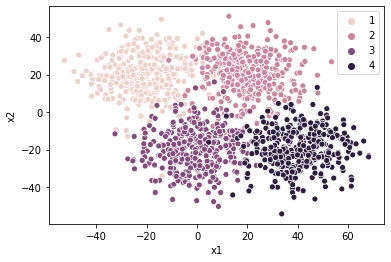

In [83]:
sns.scatterplot(file['x1'],file['x2'],hue=y,cmap)

In [84]:
en=OneHotEncoder()
en2=OneHotEncoder()
en.fit(y_train.reshape(-1,1))
yy=en.transform(y_train.reshape(-1,1)).toarray()
en2.fit(y_test.reshape(-1,1))
yt=en.transform(y_test.reshape(-1,1)).toarray()

In [90]:
NN=neural_network(np.transpose(x_train),np.transpose(yy))

Enter Number of hidden Layers3
Enter number of neurons in layer  1
16
Enter number of neurons in layer  2
8
Enter number of neurons in layer  3
4
Enter learning rate1
Enter number of epochs10000


In [91]:
NN.train()

at epoch : 0 cost = 2489.7404815239647
at epoch : 1 cost = 2407.1157359758527
at epoch : 2 cost = 2294.061532611012
at epoch : 3 cost = 2138.539185420057
at epoch : 4 cost = 1930.7065497136298
at epoch : 5 cost = 1677.1704906285995
at epoch : 6 cost = 1412.0518319364658
at epoch : 7 cost = 1173.499105634617
at epoch : 8 cost = 984.5923695389454
at epoch : 9 cost = 861.0691532856215
at epoch : 10 cost = 794.6455258432213
at epoch : 11 cost = 761.495582423524
at epoch : 12 cost = 744.5075840557121
at epoch : 13 cost = 735.3050609127332
at epoch : 14 cost = 730.0519900716689
at epoch : 15 cost = 726.9224318029987
at epoch : 16 cost = 724.9936785295522
at epoch : 17 cost = 723.772338350471
at epoch : 18 cost = 722.9816050278961
at epoch : 19 cost = 722.4599199823588
at epoch : 20 cost = 722.1098956788384
at epoch : 21 cost = 721.8712593616856
at epoch : 22 cost = 721.7058950912715
at epoch : 23 cost = 721.5892677267135
at epoch : 24 cost = 721.505351538368
at epoch : 25 cost = 721.44355151

at epoch : 226 cost = 715.3363674146226
at epoch : 227 cost = 715.2748488211577
at epoch : 228 cost = 715.2128433896316
at epoch : 229 cost = 715.1503490923341
at epoch : 230 cost = 715.0873639336477
at epoch : 231 cost = 715.0238859491693
at epoch : 232 cost = 714.9599132045867
at epoch : 233 cost = 714.8954437942887
at epoch : 234 cost = 714.8304758396939
at epoch : 235 cost = 714.7650074872771
at epoch : 236 cost = 714.6990369062819
at epoch : 237 cost = 714.6325622861053
at epoch : 238 cost = 714.5655818333444
at epoch : 239 cost = 714.4980937684962
at epoch : 240 cost = 714.4300963223114
at epoch : 241 cost = 714.3615877317986
at epoch : 242 cost = 714.2925662358859
at epoch : 243 cost = 714.2230300707508
at epoch : 244 cost = 714.1529774648292
at epoch : 245 cost = 714.0824066335296
at epoch : 246 cost = 714.011315773671
at epoch : 247 cost = 713.9397030576799
at epoch : 248 cost = 713.8675666275793
at epoch : 249 cost = 713.7949045888104
at epoch : 250 cost = 713.7217150039327
a

at epoch : 433 cost = 681.8516334878398
at epoch : 434 cost = 681.4703591302202
at epoch : 435 cost = 681.0852239670683
at epoch : 436 cost = 680.6962054274148
at epoch : 437 cost = 680.3032816753898
at epoch : 438 cost = 679.9064316472923
at epoch : 439 cost = 679.5056350893591
at epoch : 440 cost = 679.1008725962192
at epoch : 441 cost = 678.6921256500021
at epoch : 442 cost = 678.2793766600804
at epoch : 443 cost = 677.8626090034106
at epoch : 444 cost = 677.4418070654449
at epoch : 445 cost = 677.0169562815706
at epoch : 446 cost = 676.5880431790417
at epoch : 447 cost = 676.155055419355
at epoch : 448 cost = 675.717981841023
at epoch : 449 cost = 675.2768125026935
at epoch : 450 cost = 674.8315387265571
at epoch : 451 cost = 674.3821531419865
at epoch : 452 cost = 673.9286497293393
at epoch : 453 cost = 673.4710238638621
at epoch : 454 cost = 673.0092723596215
at epoch : 455 cost = 672.5433935133888
at epoch : 456 cost = 672.0733871483984
at epoch : 457 cost = 671.5992546579018
at

at epoch : 643 cost = 575.5481316899286
at epoch : 644 cost = 575.2676049700495
at epoch : 645 cost = 574.9896388904082
at epoch : 646 cost = 574.7142059180305
at epoch : 647 cost = 574.4412787022785
at epoch : 648 cost = 574.1708300821809
at epoch : 649 cost = 573.9028330933268
at epoch : 650 cost = 573.6372609743405
at epoch : 651 cost = 573.3740871729545
at epoch : 652 cost = 573.1132853516851
at epoch : 653 cost = 572.8548293931242
at epoch : 654 cost = 572.5986934048473
at epoch : 655 cost = 572.344851723939
at epoch : 656 cost = 572.0932789211348
at epoch : 657 cost = 571.8439498045744
at epoch : 658 cost = 571.5968394231586
at epoch : 659 cost = 571.3519230695015
at epoch : 660 cost = 571.1091762824668
at epoch : 661 cost = 570.8685748492768
at epoch : 662 cost = 570.6300948071795
at epoch : 663 cost = 570.3937124446633
at epoch : 664 cost = 570.1594043022035
at epoch : 665 cost = 569.9271471725322
at epoch : 666 cost = 569.696918100418
at epoch : 667 cost = 569.468694381954
at 

at epoch : 882 cost = 544.3360479885056
at epoch : 883 cost = 544.2745594668928
at epoch : 884 cost = 544.2133514161301
at epoch : 885 cost = 544.1524192801293
at epoch : 886 cost = 544.091758572954
at epoch : 887 cost = 544.0313648799797
at epoch : 888 cost = 543.9712338585784
at epoch : 889 cost = 543.9113612383983
at epoch : 890 cost = 543.8517428212988
at epoch : 891 cost = 543.7923744810012
at epoch : 892 cost = 543.7332521625026
at epoch : 893 cost = 543.6743718812963
at epoch : 894 cost = 543.6157297224393
at epoch : 895 cost = 543.5573218394939
at epoch : 896 cost = 543.4991444533782
at epoch : 897 cost = 543.4411938511417
at epoch : 898 cost = 543.3834663846882
at epoch : 899 cost = 543.3259584694617
at epoch : 900 cost = 543.2686665831079
at epoch : 901 cost = 543.2115872641207
at epoch : 902 cost = 543.154717110483
at epoch : 903 cost = 543.098052778309
at epoch : 904 cost = 543.0415909804905
at epoch : 905 cost = 542.9853284853556
at epoch : 906 cost = 542.9292621153387
at 

at epoch : 1091 cost = 533.433258424012
at epoch : 1092 cost = 533.370576575075
at epoch : 1093 cost = 533.3075934925671
at epoch : 1094 cost = 533.2443095265141
at epoch : 1095 cost = 533.1807250307688
at epoch : 1096 cost = 533.1168404038418
at epoch : 1097 cost = 533.0526560680362
at epoch : 1098 cost = 532.9881723914687
at epoch : 1099 cost = 532.9233895625036
at epoch : 1100 cost = 532.858307429459
at epoch : 1101 cost = 532.7929253199009
at epoch : 1102 cost = 532.7272418534471
at epoch : 1103 cost = 532.6612547599658
at epoch : 1104 cost = 532.5949607118994
at epoch : 1105 cost = 532.5283551758146
at epoch : 1106 cost = 532.4614322848261
at epoch : 1107 cost = 532.3941847308158
at epoch : 1108 cost = 532.3266036736846
at epoch : 1109 cost = 532.2586786642967
at epoch : 1110 cost = 532.1903975781696
at epoch : 1111 cost = 532.1217465580431
at epoch : 1112 cost = 532.0527099649075
at epoch : 1113 cost = 531.983270338606
at epoch : 1114 cost = 531.9134083705253
at epoch : 1115 cost

at epoch : 1291 cost = 510.10386384253883
at epoch : 1292 cost = 509.9554100617497
at epoch : 1293 cost = 509.807043433057
at epoch : 1294 cost = 509.6587685323244
at epoch : 1295 cost = 509.5105899637042
at epoch : 1296 cost = 509.3625123537877
at epoch : 1297 cost = 509.2145403458745
at epoch : 1298 cost = 509.06667859438835
at epoch : 1299 cost = 508.9189317594652
at epoch : 1300 cost = 508.771304501738
at epoch : 1301 cost = 508.62380147733825
at epoch : 1302 cost = 508.47642733313273
at epoch : 1303 cost = 508.3291867022103
at epoch : 1304 cost = 508.1820841996315
at epoch : 1305 cost = 508.0351244184499
at epoch : 1306 cost = 507.8883119260121
at epoch : 1307 cost = 507.74165126053765
at epoch : 1308 cost = 507.59514692798336
at epoch : 1309 cost = 507.4488033991846
at epoch : 1310 cost = 507.30262510727306
at epoch : 1311 cost = 507.15661644536135
at epoch : 1312 cost = 507.0107817644856
at epoch : 1313 cost = 506.8651253717952
at epoch : 1314 cost = 506.71965152897735
at epoch 

at epoch : 1528 cost = 482.12504119915167
at epoch : 1529 cost = 482.0331114015034
at epoch : 1530 cost = 481.94119182533706
at epoch : 1531 cost = 481.8492783805806
at epoch : 1532 cost = 481.75736697235646
at epoch : 1533 cost = 481.66545350116894
at epoch : 1534 cost = 481.57353386309387
at epoch : 1535 cost = 481.4816039499708
at epoch : 1536 cost = 481.38965964959607
at epoch : 1537 cost = 481.29769684591906
at epoch : 1538 cost = 481.20571141923847
at epoch : 1539 cost = 481.1136992464003
at epoch : 1540 cost = 481.0216562009974
at epoch : 1541 cost = 480.92957815356846
at epoch : 1542 cost = 480.83746097179846
at epoch : 1543 cost = 480.74530052071896
at epoch : 1544 cost = 480.653092662908
at epoch : 1545 cost = 480.5608332586902
at epoch : 1546 cost = 480.46851816633546
at epoch : 1547 cost = 480.37614324225694
at epoch : 1548 cost = 480.2837043412079
at epoch : 1549 cost = 480.19119731647584
at epoch : 1550 cost = 480.0986180200757
at epoch : 1551 cost = 480.0059623029397
at 

at epoch : 1734 cost = 457.13862016120356
at epoch : 1735 cost = 456.95070399072085
at epoch : 1736 cost = 456.76168334113896
at epoch : 1737 cost = 456.5715501536858
at epoch : 1738 cost = 456.3802963607818
at epoch : 1739 cost = 456.187913886755
at epoch : 1740 cost = 455.9943946485571
at epoch : 1741 cost = 455.7997305564806
at epoch : 1742 cost = 455.60391351487607
at epoch : 1743 cost = 455.40693542286965
at epoch : 1744 cost = 455.2087881750795
at epoch : 1745 cost = 455.0094636623322
at epoch : 1746 cost = 454.8089537723764
at epoch : 1747 cost = 454.6072503905955
at epoch : 1748 cost = 454.4043454007159
at epoch : 1749 cost = 454.2002306855134
at epoch : 1750 cost = 453.9948981275134
at epoch : 1751 cost = 453.7883396096863
at epoch : 1752 cost = 453.5805470161363
at epoch : 1753 cost = 453.3715122327819
at epoch : 1754 cost = 453.16122714802776
at epoch : 1755 cost = 452.94968365342527
at epoch : 1756 cost = 452.7368736443209
at epoch : 1757 cost = 452.522789020491
at epoch : 

at epoch : 1933 cost = 392.1324350635149
at epoch : 1934 cost = 391.71751493608053
at epoch : 1935 cost = 391.30312119563575
at epoch : 1936 cost = 390.88928685955676
at epoch : 1937 cost = 390.4760461597162
at epoch : 1938 cost = 390.06343457924817
at epoch : 1939 cost = 389.6514888564818
at epoch : 1940 cost = 389.2402469507459
at epoch : 1941 cost = 388.8297479661332
at epoch : 1942 cost = 388.4200320312847
at epoch : 1943 cost = 388.01114013572055
at epoch : 1944 cost = 387.6031139260307
at epoch : 1945 cost = 387.19599546809684
at epoch : 1946 cost = 386.7898269841334
at epoch : 1947 cost = 386.384650575386
at epoch : 1948 cost = 385.98050794252936
at epoch : 1949 cost = 385.5774401159673
at epoch : 1950 cost = 385.1754872072969
at epoch : 1951 cost = 384.77468819125124
at epoch : 1952 cost = 384.3750807247235
at epoch : 1953 cost = 383.97670100634207
at epoch : 1954 cost = 383.5795836769091
at epoch : 1955 cost = 383.1837617582154
at epoch : 1956 cost = 382.7892666255908
at epoch

at epoch : 2137 cost = 337.9435413478408
at epoch : 2138 cost = 337.81568515046877
at epoch : 2139 cost = 337.688640288569
at epoch : 2140 cost = 337.5623994723578
at epoch : 2141 cost = 337.4369554920196
at epoch : 2142 cost = 337.31230121684774
at epoch : 2143 cost = 337.18842959444873
at epoch : 2144 cost = 337.06533365000575
at epoch : 2145 cost = 336.94300648560005
at epoch : 2146 cost = 336.82144127958594
at epoch : 2147 cost = 336.70063128601686
at epoch : 2148 cost = 336.58056983411876
at epoch : 2149 cost = 336.46125032780867
at epoch : 2150 cost = 336.34266624525316
at epoch : 2151 cost = 336.2248111384651
at epoch : 2152 cost = 336.10767863293387
at epoch : 2153 cost = 335.9912624272856
at epoch : 2154 cost = 335.87555629297
at epoch : 2155 cost = 335.7605540739687
at epoch : 2156 cost = 335.646249686523
at epoch : 2157 cost = 335.5326371188744
at epoch : 2158 cost = 335.41971043101546
at epoch : 2159 cost = 335.3074637544458
at epoch : 2160 cost = 335.1958912919291
at epoch

at epoch : 2348 cost = 321.97418665557063
at epoch : 2349 cost = 321.9282793320144
at epoch : 2350 cost = 321.88240964445225
at epoch : 2351 cost = 321.8365659221108
at epoch : 2352 cost = 321.790735757058
at epoch : 2353 cost = 321.7449060147286
at epoch : 2354 cost = 321.6990628661853
at epoch : 2355 cost = 321.65319184775603
at epoch : 2356 cost = 321.60727795423514
at epoch : 2357 cost = 321.5613057721217
at epoch : 2358 cost = 321.51525965924236
at epoch : 2359 cost = 321.4691239763591
at epoch : 2360 cost = 321.4228833747826
at epoch : 2361 cost = 321.3765231413641
at epoch : 2362 cost = 321.33002959833846
at epoch : 2363 cost = 321.28339055023594
at epoch : 2364 cost = 321.23659576353987
at epoch : 2365 cost = 321.18963745725665
at epoch : 2366 cost = 321.1425107747348
at epoch : 2367 cost = 321.09521419991563
at epoch : 2368 cost = 321.04774987608
at epoch : 2369 cost = 321.0001237836045
at epoch : 2370 cost = 320.95234573674253
at epoch : 2371 cost = 320.9044291690182
at epoch

at epoch : 2563 cost = 313.3110509120441
at epoch : 2564 cost = 313.27407122538995
at epoch : 2565 cost = 313.23699905987587
at epoch : 2566 cost = 313.1998321814709
at epoch : 2567 cost = 313.1625683227609
at epoch : 2568 cost = 313.1252051821795
at epoch : 2569 cost = 313.08774042322176
at epoch : 2570 cost = 313.050171673637
at epoch : 2571 cost = 313.012496524603
at epoch : 2572 cost = 312.9747125298785
at epoch : 2573 cost = 312.93681720493487
at epoch : 2574 cost = 312.89880802606586
at epoch : 2575 cost = 312.86068242947425
at epoch : 2576 cost = 312.82243781033486
at epoch : 2577 cost = 312.7840715218331
at epoch : 2578 cost = 312.74558087417853
at epoch : 2579 cost = 312.7069631335922
at epoch : 2580 cost = 312.66821552126646
at epoch : 2581 cost = 312.62933521229763
at epoch : 2582 cost = 312.5903193345886
at epoch : 2583 cost = 312.5511649677229
at epoch : 2584 cost = 312.51186914180636
at epoch : 2585 cost = 312.4724288362775
at epoch : 2586 cost = 312.432840978685
at epoch

at epoch : 2786 cost = 284.9593440290923
at epoch : 2787 cost = 284.51515006677323
at epoch : 2788 cost = 284.0653030127271
at epoch : 2789 cost = 283.6095105894725
at epoch : 2790 cost = 283.14745418096845
at epoch : 2791 cost = 282.6788063728142
at epoch : 2792 cost = 282.20326781750873
at epoch : 2793 cost = 281.7206320305229
at epoch : 2794 cost = 281.23087772917347
at epoch : 2795 cost = 280.73426467816205
at epoch : 2796 cost = 280.2313767691604
at epoch : 2797 cost = 279.72304879071066
at epoch : 2798 cost = 279.21017131008136
at epoch : 2799 cost = 278.69346473773146
at epoch : 2800 cost = 278.1733441431632
at epoch : 2801 cost = 277.64991777540945
at epoch : 2802 cost = 277.1230684167318
at epoch : 2803 cost = 276.5925460421568
at epoch : 2804 cost = 276.0580339599584
at epoch : 2805 cost = 275.5191842584934
at epoch : 2806 cost = 274.9756319725408
at epoch : 2807 cost = 274.4269977425601
at epoch : 2808 cost = 273.87288546000383
at epoch : 2809 cost = 273.31287904659627
at ep

at epoch : 3015 cost = 157.4230489702118
at epoch : 3016 cost = 158.31178895089033
at epoch : 3017 cost = 156.90895472665306
at epoch : 3018 cost = 157.8056459484909
at epoch : 3019 cost = 156.40196848723127
at epoch : 3020 cost = 157.30640432163148
at epoch : 3021 cost = 155.9019603767319
at epoch : 3022 cost = 156.81394853690395
at epoch : 3023 cost = 155.40878579417677
at epoch : 3024 cost = 156.32812050481022
at epoch : 3025 cost = 154.92228656043625
at epoch : 3026 cost = 155.8487505739192
at epoch : 3027 cost = 154.44231168845235
at epoch : 3028 cost = 155.37569064411116
at epoch : 3029 cost = 153.96872327883295
at epoch : 3030 cost = 154.90880930940037
at epoch : 3031 cost = 153.5013880117663
at epoch : 3032 cost = 154.44797387275105
at epoch : 3033 cost = 153.04017143952396
at epoch : 3034 cost = 153.99304702286992
at epoch : 3035 cost = 152.58494035946467
at epoch : 3036 cost = 153.543894695775
at epoch : 3037 cost = 152.13556631544668
at epoch : 3038 cost = 153.10039006443867

at epoch : 3231 cost = 124.93597507533869
at epoch : 3232 cost = 125.80720277085786
at epoch : 3233 cost = 124.7597985495456
at epoch : 3234 cost = 125.62739521808206
at epoch : 3235 cost = 124.58496209625577
at epoch : 3236 cost = 125.44893501269043
at epoch : 3237 cost = 124.41145109999351
at epoch : 3238 cost = 125.27180663275291
at epoch : 3239 cost = 124.23925098089103
at epoch : 3240 cost = 125.09599453657336
at epoch : 3241 cost = 124.06834720179917
at epoch : 3242 cost = 124.92148318293607
at epoch : 3243 cost = 123.89872527641084
at epoch : 3244 cost = 124.74825705146579
at epoch : 3245 cost = 123.7303707781226
at epoch : 3246 cost = 124.57630066279678
at epoch : 3247 cost = 123.56326934939273
at epoch : 3248 cost = 124.40559859828569
at epoch : 3249 cost = 123.39740671136785
at epoch : 3250 cost = 124.23613551901863
at epoch : 3251 cost = 123.23276867355966
at epoch : 3252 cost = 124.06789618388932
at epoch : 3253 cost = 123.06934114338586
at epoch : 3254 cost = 123.900865466

at epoch : 3473 cost = 110.19792467644965
at epoch : 3474 cost = 110.59740890957201
at epoch : 3475 cost = 110.11784675896398
at epoch : 3476 cost = 110.51487559698111
at epoch : 3477 cost = 110.03491819202404
at epoch : 3478 cost = 110.42498492144927
at epoch : 3479 cost = 109.94527345024625
at epoch : 3480 cost = 110.32563873891908
at epoch : 3481 cost = 109.852167823003
at epoch : 3482 cost = 110.22666944527975
at epoch : 3483 cost = 109.76606710476662
at epoch : 3484 cost = 110.14413076405665
at epoch : 3485 cost = 109.69527728192807
at epoch : 3486 cost = 110.08301990221102
at epoch : 3487 cost = 109.63350805559244
at epoch : 3488 cost = 110.02340257737437
at epoch : 3489 cost = 109.55862430714228
at epoch : 3490 cost = 109.93059031714196
at epoch : 3491 cost = 109.45236843773425
at epoch : 3492 cost = 109.79327869945837
at epoch : 3493 cost = 109.32776015723044
at epoch : 3494 cost = 109.65339206457575
at epoch : 3495 cost = 109.23056428282194
at epoch : 3496 cost = 109.581905627

at epoch : 3709 cost = 98.07311227399143
at epoch : 3710 cost = 97.69380384617178
at epoch : 3711 cost = 97.45645885156004
at epoch : 3712 cost = 97.31405659232269
at epoch : 3713 cost = 97.26801956435054
at epoch : 3714 cost = 97.49264107851758
at epoch : 3715 cost = 98.63937582551239
at epoch : 3716 cost = 103.96424659384164
at epoch : 3717 cost = 120.39003842409781
at epoch : 3718 cost = 105.5855944650122
at epoch : 3719 cost = 102.42804699406872
at epoch : 3720 cost = 99.98757234759788
at epoch : 3721 cost = 98.9511299175565
at epoch : 3722 cost = 99.59921762620053
at epoch : 3723 cost = 101.65361709224834
at epoch : 3724 cost = 105.32888079491556
at epoch : 3725 cost = 115.95106301317153
at epoch : 3726 cost = 103.0212357980615
at epoch : 3727 cost = 99.68819575572068
at epoch : 3728 cost = 98.18353557465409
at epoch : 3729 cost = 97.65576580525233
at epoch : 3730 cost = 97.85913266011724
at epoch : 3731 cost = 98.75527826774943
at epoch : 3732 cost = 102.23784270926234
at epoch :

at epoch : 3929 cost = 93.25882542339161
at epoch : 3930 cost = 93.86689187545981
at epoch : 3931 cost = 96.30107172378302
at epoch : 3932 cost = 100.49748991093782
at epoch : 3933 cost = 113.72482896845493
at epoch : 3934 cost = 97.59780211180527
at epoch : 3935 cost = 94.78698718317585
at epoch : 3936 cost = 93.47670517163579
at epoch : 3937 cost = 93.046484885489
at epoch : 3938 cost = 93.61733113083858
at epoch : 3939 cost = 95.99574185668467
at epoch : 3940 cost = 100.28002471551925
at epoch : 3941 cost = 113.75974189807593
at epoch : 3942 cost = 97.46872419834641
at epoch : 3943 cost = 94.63773046387632
at epoch : 3944 cost = 93.2998326121398
at epoch : 3945 cost = 92.85699828813466
at epoch : 3946 cost = 93.41102038191724
at epoch : 3947 cost = 95.78568762678887
at epoch : 3948 cost = 100.1131154139303
at epoch : 3949 cost = 113.7696773847598
at epoch : 3950 cost = 97.31990865722828
at epoch : 3951 cost = 94.47172512459014
at epoch : 3952 cost = 93.11317391572477
at epoch : 3953

at epoch : 4181 cost = 90.06363541096832
at epoch : 4182 cost = 89.50012059204687
at epoch : 4183 cost = 91.07743929631323
at epoch : 4184 cost = 92.89712138459342
at epoch : 4185 cost = 102.18884008478341
at epoch : 4186 cost = 92.0638040361193
at epoch : 4187 cost = 89.95006003736295
at epoch : 4188 cost = 89.38845312105786
at epoch : 4189 cost = 90.96042021817557
at epoch : 4190 cost = 92.79410597484357
at epoch : 4191 cost = 102.10520042715876
at epoch : 4192 cost = 91.96807533541114
at epoch : 4193 cost = 89.83789973296878
at epoch : 4194 cost = 89.27815335795768
at epoch : 4195 cost = 90.84508885397773
at epoch : 4196 cost = 92.69204228635724
at epoch : 4197 cost = 102.02062920499843
at epoch : 4198 cost = 91.87309634191142
at epoch : 4199 cost = 89.72710480174607
at epoch : 4200 cost = 89.16917539531198
at epoch : 4201 cost = 90.73138608523024
at epoch : 4202 cost = 92.59090276106085
at epoch : 4203 cost = 101.93518721435947
at epoch : 4204 cost = 91.77883361791336
at epoch : 42

at epoch : 4387 cost = 87.79712694104377
at epoch : 4388 cost = 89.80759863393507
at epoch : 4389 cost = 99.0489677060624
at epoch : 4390 cost = 89.09888594813592
at epoch : 4391 cost = 86.69490672944022
at epoch : 4392 cost = 86.19221138599448
at epoch : 4393 cost = 87.71710406142111
at epoch : 4394 cost = 89.72664168157861
at epoch : 4395 cost = 98.95116061882445
at epoch : 4396 cost = 89.01785847334136
at epoch : 4397 cost = 86.61185110351244
at epoch : 4398 cost = 86.11127950676209
at epoch : 4399 cost = 87.63784829907311
at epoch : 4400 cost = 89.64611363340778
at epoch : 4401 cost = 98.8530788438367
at epoch : 4402 cost = 88.93706297385593
at epoch : 4403 cost = 86.52934186237326
at epoch : 4404 cost = 86.03094295540843
at epoch : 4405 cost = 87.55935700698777
at epoch : 4406 cost = 89.56600554838097
at epoch : 4407 cost = 98.75471096347684
at epoch : 4408 cost = 88.85649181896633
at epoch : 4409 cost = 86.44737213551389
at epoch : 4410 cost = 85.95119714215419
at epoch : 4411 co

at epoch : 4621 cost = 85.7830294682018
at epoch : 4622 cost = 86.83882128486192
at epoch : 4623 cost = 94.03218236525743
at epoch : 4624 cost = 86.018117716381
at epoch : 4625 cost = 84.19175057369927
at epoch : 4626 cost = 83.89594967921037
at epoch : 4627 cost = 86.01331955603945
at epoch : 4628 cost = 86.71176209734094
at epoch : 4629 cost = 93.37964847165594
at epoch : 4630 cost = 85.94616733282649
at epoch : 4631 cost = 84.43230471638165
at epoch : 4632 cost = 84.15469281354659
at epoch : 4633 cost = 86.53162556323286
at epoch : 4634 cost = 86.4967464862114
at epoch : 4635 cost = 92.08782059461717
at epoch : 4636 cost = 85.93439139847305
at epoch : 4637 cost = 85.25354383417024
at epoch : 4638 cost = 84.83079344064411
at epoch : 4639 cost = 87.71393738339421
at epoch : 4640 cost = 86.08022077311021
at epoch : 4641 cost = 89.38009893555862
at epoch : 4642 cost = 86.01014431241747
at epoch : 4643 cost = 87.65934789211121
at epoch : 4644 cost = 85.7255259041716
at epoch : 4645 cost 

at epoch : 4874 cost = 83.06527272705718
at epoch : 4875 cost = 85.05676164296094
at epoch : 4876 cost = 83.0395982071096
at epoch : 4877 cost = 84.44325888831054
at epoch : 4878 cost = 83.02616522355444
at epoch : 4879 cost = 85.00000120281848
at epoch : 4880 cost = 83.00077373586484
at epoch : 4881 cost = 84.40837981000453
at epoch : 4882 cost = 82.98714612887285
at epoch : 4883 cost = 84.94320433895031
at epoch : 4884 cost = 82.96204720095714
at epoch : 4885 cost = 84.37371265332004
at epoch : 4886 cost = 82.94821590763662
at epoch : 4887 cost = 84.88640310039071
at epoch : 4888 cost = 82.92341779648021
at epoch : 4889 cost = 84.33922667045164
at epoch : 4890 cost = 82.90937506026971
at epoch : 4891 cost = 84.82962984940943
at epoch : 4892 cost = 82.8848846417756
at epoch : 4893 cost = 84.30489073719552
at epoch : 4894 cost = 82.87062410781431
at epoch : 4895 cost = 84.77291725973232
at epoch : 4896 cost = 82.84644678226482
at epoch : 4897 cost = 84.27067334780644
at epoch : 4898 co

at epoch : 5129 cost = 82.02873081429445
at epoch : 5130 cost = 80.72470400362766
at epoch : 5131 cost = 82.00881951912493
at epoch : 5132 cost = 80.7074874008684
at epoch : 5133 cost = 81.98871715033644
at epoch : 5134 cost = 80.6902865110622
at epoch : 5135 cost = 81.96884214407942
at epoch : 5136 cost = 80.67310782452103
at epoch : 5137 cost = 81.94882800142
at epoch : 5138 cost = 80.65594620495645
at epoch : 5139 cost = 81.92899733643708
at epoch : 5140 cost = 80.63880693289086
at epoch : 5141 cost = 81.90906844508888
at epoch : 5142 cost = 80.6216860073373
at epoch : 5143 cost = 81.88928905535619
at epoch : 5144 cost = 80.60458772301709
at epoch : 5145 cost = 81.86944358701622
at epoch : 5146 cost = 80.58750900689688
at epoch : 5147 cost = 81.84972150543086
at epoch : 5148 cost = 80.57045335599979
at epoch : 5149 cost = 81.8299585635767
at epoch : 5150 cost = 80.55341845115697
at epoch : 5151 cost = 81.81029909957282
at epoch : 5152 cost = 80.53640714826398
at epoch : 5153 cost = 

at epoch : 5337 cost = 80.18561564003858
at epoch : 5338 cost = 79.1022408835267
at epoch : 5339 cost = 80.17009850046394
at epoch : 5340 cost = 79.08849189828513
at epoch : 5341 cost = 80.1546040852401
at epoch : 5342 cost = 79.07476970342634
at epoch : 5343 cost = 80.13913180108287
at epoch : 5344 cost = 79.06107389353244
at epoch : 5345 cost = 80.12368107337778
at epoch : 5346 cost = 79.047404070172
at epoch : 5347 cost = 80.10825134649468
at epoch : 5348 cost = 79.03375984226122
at epoch : 5349 cost = 80.09284208402093
at epoch : 5350 cost = 79.02014082638897
at epoch : 5351 cost = 80.07745276895305
at epoch : 5352 cost = 79.0065466471078
at epoch : 5353 cost = 80.06208290381858
at epoch : 5354 cost = 78.99297693719052
at epoch : 5355 cost = 80.04673201075306
at epoch : 5356 cost = 78.97943133785353
at epoch : 5357 cost = 80.0313996315169
at epoch : 5358 cost = 78.96590949894772
at epoch : 5359 cost = 80.0160853274684
at epoch : 5360 cost = 78.95241107911815
at epoch : 5361 cost = 

at epoch : 5587 cost = 78.36226175385133
at epoch : 5588 cost = 77.52819505493193
at epoch : 5589 cost = 78.34860256981477
at epoch : 5590 cost = 77.5165714428245
at epoch : 5591 cost = 78.33495918082139
at epoch : 5592 cost = 77.50496173307155
at epoch : 5593 cost = 78.3213315873661
at epoch : 5594 cost = 77.49336589734213
at epoch : 5595 cost = 78.30771978919415
at epoch : 5596 cost = 77.48178390726429
at epoch : 5597 cost = 78.29412378532245
at epoch : 5598 cost = 77.47021573442993
at epoch : 5599 cost = 78.28054357406089
at epoch : 5600 cost = 77.45866135039944
at epoch : 5601 cost = 78.26697915303293
at epoch : 5602 cost = 77.44712072670653
at epoch : 5603 cost = 78.25343051919666
at epoch : 5604 cost = 77.43559383486306
at epoch : 5605 cost = 78.23989766886463
at epoch : 5606 cost = 77.42408064636344
at epoch : 5607 cost = 78.22638059772393
at epoch : 5608 cost = 77.41258113268961
at epoch : 5609 cost = 78.21287930085609
at epoch : 5610 cost = 77.40109526531532
at epoch : 5611 co

at epoch : 5815 cost = 76.90425917963614
at epoch : 5816 cost = 76.2860804915431
at epoch : 5817 cost = 76.89232045360052
at epoch : 5818 cost = 76.27587100624933
at epoch : 5819 cost = 76.880395880397
at epoch : 5820 cost = 76.26567260889968
at epoch : 5821 cost = 76.86848544470163
at epoch : 5822 cost = 76.25548528080674
at epoch : 5823 cost = 76.85658913126989
at epoch : 5824 cost = 76.24530900338834
at epoch : 5825 cost = 76.84470692493761
at epoch : 5826 cost = 76.23514375816723
at epoch : 5827 cost = 76.83283881062118
at epoch : 5828 cost = 76.2249895267708
at epoch : 5829 cost = 76.82098477331809
at epoch : 5830 cost = 76.21484629093078
at epoch : 5831 cost = 76.80914479810701
at epoch : 5832 cost = 76.2047140324829
at epoch : 5833 cost = 76.79731887014871
at epoch : 5834 cost = 76.19459273336673
at epoch : 5835 cost = 76.7855069746856
at epoch : 5836 cost = 76.18448237562534
at epoch : 5837 cost = 76.7737090970428
at epoch : 5838 cost = 76.174382941405
at epoch : 5839 cost = 76

at epoch : 6062 cost = 75.1087718411386
at epoch : 6063 cost = 75.52782250890354
at epoch : 6064 cost = 75.09981665001114
at epoch : 6065 cost = 75.51754804072311
at epoch : 6066 cost = 75.09087101526951
at epoch : 6067 cost = 75.50728647251816
at epoch : 6068 cost = 75.08193493128833
at epoch : 6069 cost = 75.49703779963755
at epoch : 6070 cost = 75.07300839257226
at epoch : 6071 cost = 75.4868020175234
at epoch : 6072 cost = 75.06409139375678
at epoch : 6073 cost = 75.47657912171113
at epoch : 6074 cost = 75.05518392960906
at epoch : 6075 cost = 75.4663691078302
at epoch : 6076 cost = 75.04628599502868
at epoch : 6077 cost = 75.45617197160425
at epoch : 6078 cost = 75.03739758504854
at epoch : 6079 cost = 75.44598770885139
at epoch : 6080 cost = 75.02851869483558
at epoch : 6081 cost = 75.43581631548463
at epoch : 6082 cost = 75.01964931969165
at epoch : 6083 cost = 75.42565778751235
at epoch : 6084 cost = 75.0107894550545
at epoch : 6085 cost = 75.41551212103872
at epoch : 6086 cost

at epoch : 6287 cost = 74.45685673989364
at epoch : 6288 cost = 74.15696927325712
at epoch : 6289 cost = 74.44802292125664
at epoch : 6290 cost = 74.14909561060438
at epoch : 6291 cost = 74.43920220750377
at epoch : 6292 cost = 74.1412319585457
at epoch : 6293 cost = 74.43039460926326
at epoch : 6294 cost = 74.13337833430948
at epoch : 6295 cost = 74.42160013737748
at epoch : 6296 cost = 74.12553475543737
at epoch : 6297 cost = 74.41281880290475
at epoch : 6298 cost = 74.11770123978702
at epoch : 6299 cost = 74.40405061712183
at epoch : 6300 cost = 74.10987780553515
at epoch : 6301 cost = 74.39529559152595
at epoch : 6302 cost = 74.10206447118006
at epoch : 6303 cost = 74.38655373783668
at epoch : 6304 cost = 74.09426125554471
at epoch : 6305 cost = 74.3778250679985
at epoch : 6306 cost = 74.08646817777968
at epoch : 6307 cost = 74.36910959418303
at epoch : 6308 cost = 74.07868525736596
at epoch : 6309 cost = 74.36040732879077
at epoch : 6310 cost = 74.07091251411788
at epoch : 6311 co

at epoch : 6517 cost = 73.53133132094158
at epoch : 6518 cost = 73.32403793304223
at epoch : 6519 cost = 73.52414301604887
at epoch : 6520 cost = 73.31752882817631
at epoch : 6521 cost = 73.51697098465485
at epoch : 6522 cost = 73.31103461065467
at epoch : 6523 cost = 73.50981527386176
at epoch : 6524 cost = 73.3045553561904
at epoch : 6525 cost = 73.50267593099849
at epoch : 6526 cost = 73.2980911411515
at epoch : 6527 cost = 73.49555300360848
at epoch : 6528 cost = 73.2916420425586
at epoch : 6529 cost = 73.48844653943732
at epoch : 6530 cost = 73.28520813808242
at epoch : 6531 cost = 73.48135658641941
at epoch : 6532 cost = 73.27878950604045
at epoch : 6533 cost = 73.47428319266376
at epoch : 6534 cost = 73.27238622539377
at epoch : 6535 cost = 73.46722640643998
at epoch : 6536 cost = 73.26599837574341
at epoch : 6537 cost = 73.46018627616255
at epoch : 6538 cost = 73.25962603732592
at epoch : 6539 cost = 73.4531628503749
at epoch : 6540 cost = 73.25326929100902
at epoch : 6541 cost

at epoch : 6742 cost = 72.70708545140613
at epoch : 6743 cost = 72.83031020227578
at epoch : 6744 cost = 72.70275776120343
at epoch : 6745 cost = 72.82508624378961
at epoch : 6746 cost = 72.69845222409718
at epoch : 6747 cost = 72.8198753143359
at epoch : 6748 cost = 72.69416877405435
at epoch : 6749 cost = 72.81467714362437
at epoch : 6750 cost = 72.68990733915354
at epoch : 6751 cost = 72.80949145418364
at epoch : 6752 cost = 72.68566784147978
at epoch : 6753 cost = 72.80431796139055
at epoch : 6754 cost = 72.68145019702146
at epoch : 6755 cost = 72.79915637350848
at epoch : 6756 cost = 72.67725431556926
at epoch : 6757 cost = 72.79400639173612
at epoch : 6758 cost = 72.67308010061828
at epoch : 6759 cost = 72.78886771026805
at epoch : 6760 cost = 72.6689274492737
at epoch : 6761 cost = 72.78374001636632
at epoch : 6762 cost = 72.66479625215888
at epoch : 6763 cost = 72.77862299044219
at epoch : 6764 cost = 72.66068639332727
at epoch : 6765 cost = 72.77351630615064
at epoch : 6766 co

at epoch : 6978 cost = 72.28225455359268
at epoch : 6979 cost = 72.21181810149861
at epoch : 6980 cost = 72.27842981399155
at epoch : 6981 cost = 72.20597512819015
at epoch : 6982 cost = 72.27457943776298
at epoch : 6983 cost = 72.20011991659796
at epoch : 6984 cost = 72.27070271804885
at epoch : 6985 cost = 72.19425255783901
at epoch : 6986 cost = 72.26679893977615
at epoch : 6987 cost = 72.18837314085232
at epoch : 6988 cost = 72.2628673795736
at epoch : 6989 cost = 72.18248175202879
at epoch : 6990 cost = 72.25890730570609
at epoch : 6991 cost = 72.17657847484443
at epoch : 6992 cost = 72.25491797802789
at epoch : 6993 cost = 72.17066338950175
at epoch : 6994 cost = 72.25089864795777
at epoch : 6995 cost = 72.16473657257703
at epoch : 6996 cost = 72.24684855847616
at epoch : 6997 cost = 72.15879809667561
at epoch : 6998 cost = 72.24276694414661
at epoch : 6999 cost = 72.15284803009507
at epoch : 7000 cost = 72.23865303116352
at epoch : 7001 cost = 72.1468864364991
at epoch : 7002 co

at epoch : 7196 cost = 71.57711766323925
at epoch : 7197 cost = 71.50106230998469
at epoch : 7198 cost = 71.56774213804076
at epoch : 7199 cost = 71.49391965924703
at epoch : 7200 cost = 71.55834149431308
at epoch : 7201 cost = 71.48677509587671
at epoch : 7202 cost = 71.54891698714405
at epoch : 7203 cost = 71.47962904177906
at epoch : 7204 cost = 71.53946985485732
at epoch : 7205 cost = 71.4724819120297
at epoch : 7206 cost = 71.53000131781747
at epoch : 7207 cost = 71.46533411437306
at epoch : 7208 cost = 71.52051257732788
at epoch : 7209 cost = 71.45818604876344
at epoch : 7210 cost = 71.51100481462049
at epoch : 7211 cost = 71.45103810694802
at epoch : 7212 cost = 71.50147918993662
at epoch : 7213 cost = 71.4438906720907
at epoch : 7214 cost = 71.49193684169722
at epoch : 7215 cost = 71.43674411843833
at epoch : 7216 cost = 71.4823788857613
at epoch : 7217 cost = 71.42959881102564
at epoch : 7218 cost = 71.47280641477
at epoch : 7219 cost = 71.42245510542034
at epoch : 7220 cost =

at epoch : 7425 cost = 70.7231698164507
at epoch : 7426 cost = 70.50249763319371
at epoch : 7427 cost = 70.71679518927927
at epoch : 7428 cost = 70.49376643891051
at epoch : 7429 cost = 70.71042812532707
at epoch : 7430 cost = 70.48504734964938
at epoch : 7431 cost = 70.7040686059839
at epoch : 7432 cost = 70.47634032249854
at epoch : 7433 cost = 70.69771661283278
at epoch : 7434 cost = 70.46764531409626
at epoch : 7435 cost = 70.69137212764824
at epoch : 7436 cost = 70.45896228065854
at epoch : 7437 cost = 70.68503513239372
at epoch : 7438 cost = 70.4502911780055
at epoch : 7439 cost = 70.67870560921982
at epoch : 7440 cost = 70.44163196158689
at epoch : 7441 cost = 70.67238354046125
at epoch : 7442 cost = 70.43298458650574
at epoch : 7443 cost = 70.66606890863386
at epoch : 7444 cost = 70.42434900754117
at epoch : 7445 cost = 70.65976169643126
at epoch : 7446 cost = 70.41572517916985
at epoch : 7447 cost = 70.65346188672186
at epoch : 7448 cost = 70.40711305558708
at epoch : 7449 cos

at epoch : 7641 cost = 70.07524661170848
at epoch : 7642 cost = 69.6199442936925
at epoch : 7643 cost = 70.06960174135764
at epoch : 7644 cost = 69.61225189266278
at epoch : 7645 cost = 70.06396284795983
at epoch : 7646 cost = 69.60456670569187
at epoch : 7647 cost = 70.0583299162924
at epoch : 7648 cost = 69.59688869398357
at epoch : 7649 cost = 70.05270293109356
at epoch : 7650 cost = 69.58921781892357
at epoch : 7651 cost = 70.04708187706309
at epoch : 7652 cost = 69.58155404208003
at epoch : 7653 cost = 70.04146673886227
at epoch : 7654 cost = 69.5738973252038
at epoch : 7655 cost = 70.03585750111422
at epoch : 7656 cost = 69.56624763022876
at epoch : 7657 cost = 70.03025414840414
at epoch : 7658 cost = 69.55860491927226
at epoch : 7659 cost = 70.02465666528016
at epoch : 7660 cost = 69.55096915463564
at epoch : 7661 cost = 70.01906503625301
at epoch : 7662 cost = 69.54334029880413
at epoch : 7663 cost = 70.01347924579653
at epoch : 7664 cost = 69.53571831444725
at epoch : 7665 cos

at epoch : 7852 cost = 68.84523376014151
at epoch : 7853 cost = 69.50706378441362
at epoch : 7854 cost = 68.83812111918263
at epoch : 7855 cost = 69.5019623627654
at epoch : 7856 cost = 68.83101259714371
at epoch : 7857 cost = 69.49686517256387
at epoch : 7858 cost = 68.82390817326765
at epoch : 7859 cost = 69.49177219695889
at epoch : 7860 cost = 68.81680782693985
at epoch : 7861 cost = 69.48668341910769
at epoch : 7862 cost = 68.80971153768786
at epoch : 7863 cost = 69.48159882217635
at epoch : 7864 cost = 68.80261928518087
at epoch : 7865 cost = 69.476518389339
at epoch : 7866 cost = 68.79553104922857
at epoch : 7867 cost = 69.47144210377849
at epoch : 7868 cost = 68.78844680978082
at epoch : 7869 cost = 69.46636994868719
at epoch : 7870 cost = 68.78136654692699
at epoch : 7871 cost = 69.46130190726689
at epoch : 7872 cost = 68.77429024089517
at epoch : 7873 cost = 69.45623796272884
at epoch : 7874 cost = 68.7672178720513
at epoch : 7875 cost = 69.4511780982946
at epoch : 7876 cost 

at epoch : 8077 cost = 68.9582543710111
at epoch : 8078 cost = 68.06353975843055
at epoch : 8079 cost = 68.95352568047444
at epoch : 8080 cost = 68.0567905998685
at epoch : 8081 cost = 68.94879944566212
at epoch : 8082 cost = 68.0500439752739
at epoch : 8083 cost = 68.94407565224242
at epoch : 8084 cost = 68.04329987633457
at epoch : 8085 cost = 68.93935428591936
at epoch : 8086 cost = 68.03655829482136
at epoch : 8087 cost = 68.93463533243272
at epoch : 8088 cost = 68.02981922258763
at epoch : 8089 cost = 68.92991877755836
at epoch : 8090 cost = 68.02308265156904
at epoch : 8091 cost = 68.92520460710861
at epoch : 8092 cost = 68.01634857378299
at epoch : 8093 cost = 68.92049280693227
at epoch : 8094 cost = 68.00961698132832
at epoch : 8095 cost = 68.91578336291498
at epoch : 8096 cost = 68.00288786638495
at epoch : 8097 cost = 68.91107626097943
at epoch : 8098 cost = 67.99616122121355
at epoch : 8099 cost = 68.90637148708551
at epoch : 8100 cost = 67.9894370381549
at epoch : 8101 cost

at epoch : 8296 cost = 67.34146969071736
at epoch : 8297 cost = 68.44996185348248
at epoch : 8298 cost = 67.334963174954
at epoch : 8299 cost = 68.4454264152429
at epoch : 8300 cost = 67.3284586984467
at epoch : 8301 cost = 68.44089211996041
at epoch : 8302 cost = 67.32195625978017
at epoch : 8303 cost = 68.43635895858438
at epoch : 8304 cost = 67.31545585758275
at epoch : 8305 cost = 68.43182692212304
at epoch : 8306 cost = 67.30895749052598
at epoch : 8307 cost = 68.4272960016437
at epoch : 8308 cost = 67.3024611573244
at epoch : 8309 cost = 68.42276618827265
at epoch : 8310 cost = 67.29596685673482
at epoch : 8311 cost = 68.41823747319539
at epoch : 8312 cost = 67.28947458755633
at epoch : 8313 cost = 68.41370984765685
at epoch : 8314 cost = 67.28298434862982
at epoch : 8315 cost = 68.40918330296135
at epoch : 8316 cost = 67.27649613883767
at epoch : 8317 cost = 68.40465783047293
at epoch : 8318 cost = 67.27000995710341
at epoch : 8319 cost = 68.40013342161524
at epoch : 8320 cost =

at epoch : 8549 cost = 67.88516243021193
at epoch : 8550 cost = 66.53135646734596
at epoch : 8551 cost = 67.88071972515455
at epoch : 8552 cost = 66.52510899242414
at epoch : 8553 cost = 67.8762775111436
at epoch : 8554 cost = 66.5188636305202
at epoch : 8555 cost = 67.87183578710808
at epoch : 8556 cost = 66.51262038376811
at epoch : 8557 cost = 67.86739455204652
at epoch : 8558 cost = 66.50637925432557
at epoch : 8559 cost = 67.86295380502737
at epoch : 8560 cost = 66.50014024437414
at epoch : 8561 cost = 67.85851354518914
at epoch : 8562 cost = 66.4939033561195
at epoch : 8563 cost = 67.85407377174066
at epoch : 8564 cost = 66.48766859179169
at epoch : 8565 cost = 67.84963448396147
at epoch : 8566 cost = 66.48143595364537
at epoch : 8567 cost = 67.84519568120223
at epoch : 8568 cost = 66.47520544396008
at epoch : 8569 cost = 67.84075736288496
at epoch : 8570 cost = 66.46897706504043
at epoch : 8571 cost = 67.83631952850315
at epoch : 8572 cost = 66.46275081921635
at epoch : 8573 cos

at epoch : 8790 cost = 65.79762752399603
at epoch : 8791 cost = 67.3515589484118
at epoch : 8792 cost = 65.79165986844671
at epoch : 8793 cost = 67.34719377415536
at epoch : 8794 cost = 65.78569493705498
at epoch : 8795 cost = 67.34282971923213
at epoch : 8796 cost = 65.77973274147709
at epoch : 8797 cost = 67.33846680032853
at epoch : 8798 cost = 65.77377329359844
at epoch : 8799 cost = 67.3341050345017
at epoch : 8800 cost = 65.76781660553954
at epoch : 8801 cost = 67.3297444391887
at epoch : 8802 cost = 65.76186268966185
at epoch : 8803 cost = 67.32538503221565
at epoch : 8804 cost = 65.75591155857401
at epoch : 8805 cost = 67.32102683180761
at epoch : 8806 cost = 65.7499632251382
at epoch : 8807 cost = 67.31666985659828
at epoch : 8808 cost = 65.74401770247637
at epoch : 8809 cost = 67.31231412564023
at epoch : 8810 cost = 65.73807500397722
at epoch : 8811 cost = 67.30795965841563
at epoch : 8812 cost = 65.73213514330305
at epoch : 8813 cost = 67.3036064748472
at epoch : 8814 cost 

at epoch : 9024 cost = 65.12467071511693
at epoch : 9025 cost = 66.85899250420269
at epoch : 9026 cost = 65.11926951229418
at epoch : 9027 cost = 66.85516109985114
at epoch : 9028 cost = 65.11387897749542
at epoch : 9029 cost = 66.85134491299522
at epoch : 9030 cost = 65.10849934227488
at epoch : 9031 cost = 66.84754444425246
at epoch : 9032 cost = 65.10313084339467
at epoch : 9033 cost = 66.84376021354589
at epoch : 9034 cost = 65.09777372269232
at epoch : 9035 cost = 66.83999276083117
at epoch : 9036 cost = 65.09242822690487
at epoch : 9037 cost = 66.83624264683627
at epoch : 9038 cost = 65.08709460744409
at epoch : 9039 cost = 66.8325104538124
at epoch : 9040 cost = 65.08177312011611
at epoch : 9041 cost = 66.8287967862926
at epoch : 9042 cost = 65.0764640247779
at epoch : 9043 cost = 66.82510227185428
at epoch : 9044 cost = 65.0711675849229
at epoch : 9045 cost = 66.82142756188222
at epoch : 9046 cost = 65.06588406718667
at epoch : 9047 cost = 66.81777333232631
at epoch : 9048 cost

at epoch : 9240 cost = 64.5771866764569
at epoch : 9241 cost = 66.59618411571417
at epoch : 9242 cost = 64.57189772866104
at epoch : 9243 cost = 66.59357059245686
at epoch : 9244 cost = 64.5665841753403
at epoch : 9245 cost = 66.59089245914717
at epoch : 9246 cost = 64.561245403694
at epoch : 9247 cost = 66.58814849439615
at epoch : 9248 cost = 64.55588099990699
at epoch : 9249 cost = 66.58533772433921
at epoch : 9250 cost = 64.55049074295826
at epoch : 9251 cost = 66.58245942016175
at epoch : 9252 cost = 64.54507459503188
at epoch : 9253 cost = 66.57951309138306
at epoch : 9254 cost = 64.5396326889432
at epoch : 9255 cost = 66.5764984753711
at epoch : 9256 cost = 64.5341653130761
at epoch : 9257 cost = 66.57341552365754
at epoch : 9258 cost = 64.52867289438721
at epoch : 9259 cost = 66.5702643857055
at epoch : 9260 cost = 64.52315598006814
at epoch : 9261 cost = 66.56704539081693
at epoch : 9262 cost = 64.51761521846471
at epoch : 9263 cost = 66.56375902888075
at epoch : 9264 cost = 6

at epoch : 9465 cost = 66.06159920714933
at epoch : 9466 cost = 63.915325755178415
at epoch : 9467 cost = 66.05621044728966
at epoch : 9468 cost = 63.9094849044734
at epoch : 9469 cost = 66.0508249240325
at epoch : 9470 cost = 63.903648867388995
at epoch : 9471 cost = 66.04544269974416
at epoch : 9472 cost = 63.89781766131759
at epoch : 9473 cost = 66.0400638329539
at epoch : 9474 cost = 63.891991302303325
at epoch : 9475 cost = 66.03468837853754
at epoch : 9476 cost = 63.8861698051046
at epoch : 9477 cost = 66.02931638789335
at epoch : 9478 cost = 63.880353183253625
at epoch : 9479 cost = 66.02394790910948
at epoch : 9480 cost = 63.874541449113934
at epoch : 9481 cost = 66.01858298712561
at epoch : 9482 cost = 63.86873461393537
at epoch : 9483 cost = 66.01322166388564
at epoch : 9484 cost = 63.86293268790668
at epoch : 9485 cost = 66.00786397848543
at epoch : 9486 cost = 63.85713568020619
at epoch : 9487 cost = 66.00250996731259
at epoch : 9488 cost = 63.85134359905018
at epoch : 9489

at epoch : 9720 cost = 63.21201289377794
at epoch : 9721 cost = 65.40261306549928
at epoch : 9722 cost = 63.20676598968953
at epoch : 9723 cost = 65.39769824644381
at epoch : 9724 cost = 63.20152331680591
at epoch : 9725 cost = 65.39278672667885
at epoch : 9726 cost = 63.1962848683777
at epoch : 9727 cost = 65.38787849986912
at epoch : 9728 cost = 63.191050637683155
at epoch : 9729 cost = 65.38297355973836
at epoch : 9730 cost = 63.18582061802778
at epoch : 9731 cost = 65.37807190006862
at epoch : 9732 cost = 63.180594802744096
at epoch : 9733 cost = 65.37317351470011
at epoch : 9734 cost = 63.17537318519131
at epoch : 9735 cost = 65.36827839753029
at epoch : 9736 cost = 63.170155758755115
at epoch : 9737 cost = 65.36338654251398
at epoch : 9738 cost = 63.16494251684728
at epoch : 9739 cost = 65.35849794366209
at epoch : 9740 cost = 63.159733452905456
at epoch : 9741 cost = 65.35361259504188
at epoch : 9742 cost = 63.154528560392706
at epoch : 9743 cost = 65.34873049077567
at epoch : 9

at epoch : 9942 cost = 62.6540608191098
at epoch : 9943 cost = 64.87608369945076
at epoch : 9944 cost = 62.64924633908315
at epoch : 9945 cost = 64.87150598902618
at epoch : 9946 cost = 62.64443542848534
at epoch : 9947 cost = 64.8669311037164
at epoch : 9948 cost = 62.63962808138217
at epoch : 9949 cost = 64.86235904014964
at epoch : 9950 cost = 62.634824291827215
at epoch : 9951 cost = 64.85778979495115
at epoch : 9952 cost = 62.63002405386157
at epoch : 9953 cost = 64.8532233647427
at epoch : 9954 cost = 62.625227361513566
at epoch : 9955 cost = 64.84865974614209
at epoch : 9956 cost = 62.62043420879846
at epoch : 9957 cost = 64.84409893576279
at epoch : 9958 cost = 62.61564458971827
at epoch : 9959 cost = 64.83954093021369
at epoch : 9960 cost = 62.61085849826132
at epoch : 9961 cost = 64.83498572609837
at epoch : 9962 cost = 62.606075928402134
at epoch : 9963 cost = 64.830433320015
at epoch : 9964 cost = 62.601296874101095
at epoch : 9965 cost = 64.8258837085558
at epoch : 9966 co

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [101]:
ress=NN.test(np.transpose(x_test)).round()

In [111]:
accuracy_score(yt,np.transpose(ress))

0.9264705882352942

In [ ]:
## predicted Classes

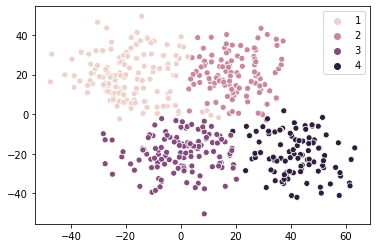

In [128]:
y_pred=en.inverse_transform(np.transpose(ress))
sns.scatterplot(np.transpose(x_test)[0],np.transpose(x_test)[1],hue=y_pred.flatten())